> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - The Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling_q1">Data Wrangling of Q1</a></li>
<li><a href="#eda_q1">Exploratory Data Analysis of Q1</a></li>    
<li><a href='#wrangling_q2'>Data Wrangling of Q2</a></li>
<li><a href="#eda_q2">Exploratory Data Analysis of Q2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: The selected dataset for investigations is **The Movie Database**, which can be donwloaded from [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv). 

It comprises of the follwing columns:
  - id - each movie's id
  - imdb_id - each movie's id from imdb, to be *dropped*
  - popularity - popularity score
  - budget - initial budget without inflation adjustment, to be *dropped*
  - revenue - initial revenue without inflation adjustment, to be *dropped*
  - original_title - movie's title
  - cast - list of actors
  - homepage - link to the homepage, to be *dropped*
  - director - list of directors
  - tagline - short description, to be *dropped*
  - keywords - list of keywords significant for that movie
  - overview - short overview of the movie, to be *dropped*
  - runtime - movie's length in minutes
  - genres - list of genres that are matching the movie type
  - production_companies - companies involved in the movie's production
  - release date - date of release
  - vote_counts - amount of votes
  - vote_average - the average vote
  - release_year - year of release
  - budget_adj - the budget adjusted for year 2010, accounting for inflation over time
  - revenue_adj - the revenue adjusted for year 2010, accounting for inflation over time
  - profit_adj - **calculated** columnn -> represents the adjusted revenue - adjusted budget
  - profit_adj_perc - **calculated** column --> represents the profit in percentage



### Question(s) for Analysis
>**Q1**: Which genres are most popular from year to year?

> **Q2**: What kinds of properties are associated with movies that have high revenues? 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
print(pd.__version__)

1.4.4


<a id='wrangling_q1'></a>
## **Q1.** Data Wrangling

   1. load in the data
   2. check for cleanliness
   3. trim and clean the dataset for analysis.


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df= pd.read_csv('tmdb-movies.csv', index_col='id')

> Data inspection by using methods: head, describe and info

In [4]:
# data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [5]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


1. based on the above result we can see that some of the columns `imdb_id`, `homepage`, `tagline`and `overview` could be dropped as they are not of interest

2. columns `cast`, `keywords`, `genres` and `production_companies` contain multiple values, split by |, it may be usefull to create separate columns

3. using describe() method, we can observe that at least 50% of the movies don't have values for either `budget`, `revenue`,`budget_adj` or `revenue_adj`, while the min value of `runtime` is 0

4. using the .info() method we can see that column `release_date` is of type oject and it should be date/time

5. columns related to money use the scientific notation, to get rid of that, we can divide by **1e+6**, thus bringing the data into millions

In [7]:
df.duplicated().sum()

1

6. counting the duplicates, only one movie is duplicated


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

> Based on all of the above statements we can start the initial phase of cleaning:
>1. Drop columns
>2. Remove duplicates
>3. Convert object to date/time type
>4. Convert money related columns from scientific notation to Millions
>5. create a clean dataset containing only movies with values greater than 0  for budget/_adj and revenue/_adj

> Drop columns

In [8]:
# removing columns that may not bring any value to the analysis
df = df.drop(['imdb_id', 'homepage', 'tagline', 'overview'], axis=1)

> Remove duplicates

In [9]:
# drop duplicated rows
df = df.drop_duplicates()

> Convert `release_date` from string to date type

In [10]:
# convert release date from obj to date time format
df['release_date'] = pd.to_datetime(df['release_date'])

> Convert money related columns from scientific notation to Millions

In [11]:
df['budget'] = df['budget']/1e+6
df['budget_adj'] = df['budget_adj']/1e+6
df['revenue'] = df['revenue']/1e+6
df['revenue_adj'] = df['revenue_adj']/1e+6

> Inspect the dataset again

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 135397 to 22293
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10865 non-null  float64       
 1   budget                10865 non-null  float64       
 2   revenue               10865 non-null  float64       
 3   original_title        10865 non-null  object        
 4   cast                  10789 non-null  object        
 5   director              10821 non-null  object        
 6   keywords              9372 non-null   object        
 7   runtime               10865 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9835 non-null   object        
 10  release_date          10865 non-null  datetime64[ns]
 11  vote_count            10865 non-null  int64         
 12  vote_average          10865 non-null  float64       
 13  release_yea

In [13]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
135397,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445893
76341,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137.999939,348.161292
262500,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101.199955,271.619025
140607,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183.999919,1902.723130
168259,9.335014,190.0,1506.249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174.799923,1385.748801


In [14]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,14.624286,39.826896,102.071790,217.399632,5.975012,2001.321859,17.549894,51.369002
std,1.000231,30.914285,117.008277,31.382701,575.644627,0.935138,12.813260,34.307527,144.638333
min,0.000065,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000,0.000000,0.000000
25%,0.207575,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000,0.000000,0.000000
50%,0.383831,0.000000,0.000000,99.000000,38.000000,6.000000,2006.000000,0.000000,0.000000
75%,0.713857,15.000000,24.000000,111.000000,146.000000,6.600000,2011.000000,20.853251,33.701729
max,32.985763,425.000000,2781.505847,900.000000,9767.000000,9.200000,2015.000000,425.000000,2827.123750


### Creating a df for Q1 to work on

> At this point the initial dataset is cleaned up, but due to the nature of the 2 questions, I will create separated data frames that I can work and manipulae easier. 

> For example, to answer Q1, I can use all or almost all 10865 movies, although many have null values for `budget`, `revenue`, `budget_adj` or `revenue_adj`, as the question is related to the popularity.

> Getting a dataset where `genres` has data.

    There are 23 less rows, compared to the cleaned dataframe

In [15]:
# To answer the question "Which genres are most popular from year to year?"
# I mainly need the columns popularity, genres and release year
# therefore i created a df for this reason
genres_popularity = df.query('genres.notna()')
genres_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 135397 to 22293
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10842 non-null  float64       
 1   budget                10842 non-null  float64       
 2   revenue               10842 non-null  float64       
 3   original_title        10842 non-null  object        
 4   cast                  10767 non-null  object        
 5   director              10800 non-null  object        
 6   keywords              9367 non-null   object        
 7   runtime               10842 non-null  int64         
 8   genres                10842 non-null  object        
 9   production_companies  9826 non-null   object        
 10  release_date          10842 non-null  datetime64[ns]
 11  vote_count            10842 non-null  int64         
 12  vote_average          10842 non-null  float64       
 13  release_yea

In [16]:
genres_popularity.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
135397,32.985763,150.0,1513.528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445893
76341,28.419936,150.0,378.436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137.999939,348.161292
262500,13.112507,110.0,295.238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101.199955,271.619025
140607,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183.999919,1902.723130
168259,9.335014,190.0,1506.249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174.799923,1385.748801


> A couple of functions had to be developed for easier manipulation of the data.
> 1. **column_split** --> takes a df and a column name, returns a dataframe with columns for each unique element found in that provided column.
> 2. **str_to_list_col** --> given a df and a list of columns, converts them from strings to column of lists, provided that there a separator between the strings, as is the case here
> 3. **genres_mask** --> returns mask and counts of a given word in the specified column

In [17]:
#
def column_split(df, col_name):
    local_df= df
    for row in local_df[col_name].index:
        #print(df_clean2.loc[row, 'genres'])
        for elem in local_df.loc[row, col_name]:
            col = col_name[0] +"_"+ elem.lower()
            local_df.loc[row, col] = elem
    return local_df
    

# without splitting the column, this way i can search for a specific genres inside the list of genres and count the
# total number of occurences 
def genres_mask(df, col_name, search_for):
    counts= df[col_name].str.contains(search_for).sum() # returns count of rows containing Action in column genres
    mask = df[col_name].str.contains(search_for)        # returns mask of rows cointaining action (true or false)
    return mask, counts

# convert column of strings to column of lists
def str_to_list_col(df, columns_to_convert):
    for col in columns_to_convert:
        df[col] =df[col].str.split('|');
    return df

> Converting columns `genres`, `cast`, `keywords`, `production_companies` from strings to lists

In [18]:
# use the above column_split function on the dataframe and provide the name of the column you want to split in multiple columns
columns_to_list =['genres','cast','production_companies','keywords']

genres_popularity = str_to_list_col(genres_popularity, columns_to_list)
genres_popularity

C:\Users\gavrilap\AppData\Local\Temp\ipykernel_137892\1073098810.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] =df[col].str.split('|');


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,
135397,32.985763,150.000,1513.528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,137.999939,1392.445893
76341,28.419936,150.000,378.436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,137.999939,348.161292
262500,13.112507,110.000,295.238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,101.199955,271.619025
140607,11.173104,200.000,2068.178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,183.999919,1902.723130
168259,9.335014,190.000,1506.249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,174.799923,1385.748801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.080598,0.000,0.000000,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho...",Bruce Brown,"[surfer, surfboard, surfing]",95,[Documentary],[Bruce Brown Films],2066-06-15,11,7.4,1966,0.000000,0.000000
20379,0.065543,0.000,0.000000,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",John Frankenheimer,"[car race, racing, formula 1]",176,"[Action, Adventure, Drama]","[Cherokee Productions, Joel Productions, Dougl...",2066-12-21,20,5.7,1966,0.000000,0.000000
39768,0.065141,0.000,0.000000,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",Eldar Ryazanov,"[car, trolley, stealing car]",94,"[Mystery, Comedy]",[Mosfilm],2066-01-01,11,6.5,1966,0.000000,0.000000


<a id='eda_q1'></a>
## Exploratory Data Analysis of Q1

>  **Computing statistics** and **creating visualizations** with the goal of addressing the research questions 


### Research Question 1: Which genres are most popular from year to year?

> For each cell in `genres`, instead of creating columns based on the list, create rows of the same movie for each genres.

> If `genres` for movie x contains `Action` and `Adeventure`, then 2 new rows shall be created for that movie for each genres, while the initial row has to be dropped, that is achieved by using the `explode()` method.

> Use that df to group by `release_year` and `genres`, then calculate the *mean* of `popularity`.

In [19]:
# to implement the above described idea, one can use the .explode() method 
# to which the desired column name has to be provided
genres_popularity_exploded = genres_popularity.explode('genres')
genres_popularity_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 135397 to 22293
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            26955 non-null  float64       
 1   budget                26955 non-null  float64       
 2   revenue               26955 non-null  float64       
 3   original_title        26955 non-null  object        
 4   cast                  26831 non-null  object        
 5   director              26864 non-null  object        
 6   keywords              23634 non-null  object        
 7   runtime               26955 non-null  int64         
 8   genres                26955 non-null  object        
 9   production_companies  24757 non-null  object        
 10  release_date          26955 non-null  datetime64[ns]
 11  vote_count            26955 non-null  int64         
 12  vote_average          26955 non-null  float64       
 13  release_yea

In [20]:
# firstly groupy by year, then by genres and calculate the average popularity per year and genres
# the second groupby is applied on the series from point 1, which groups by year the largest value
genres_popularity_exploded = genres_popularity_exploded.groupby(['release_year', 'genres']).mean()['popularity'].groupby(level= 'release_year').nlargest(1).reset_index(level=0, drop=True)


> The second *groupby* `release_year` combined with the *nlargest(1)* will take the maximum of the initial *groupby* for each year. See below

In [21]:
genres_popularity_exploded

release_year  genres         
1960          Thriller           0.811910
1961          Animation          2.631987
1962          Adventure          0.942513
1963          Animation          2.180410
1964          War                0.930959
1965          Music              0.968850
1966          Animation          0.585717
1967          Animation          1.348805
1968          Mystery            1.519456
1969          Crime              0.948020
1970          Animation          1.127719
1971          Family             1.530722
1972          Crime              1.072768
1973          Animation          0.956526
1974          Mystery            0.702035
1975          Adventure          0.880297
1976          Crime              0.707249
1977          Action             1.419319
1978          Music              0.679805
1979          Action             1.410014
1980          Science Fiction    0.897143
1981          Adventure          0.875815
1982          War                1.143182
1983

> We have all the ingredients to create the visualization of **The most popular genre over the years**.

> Using pandas, we plot the most popular genre over the years, unfortunately the bar plot considers each genre as a category and therefore, it aims to plot 20 (or all available) genres for each year, thus the bars are pretty slim. Incresing the width of the bars does not help.

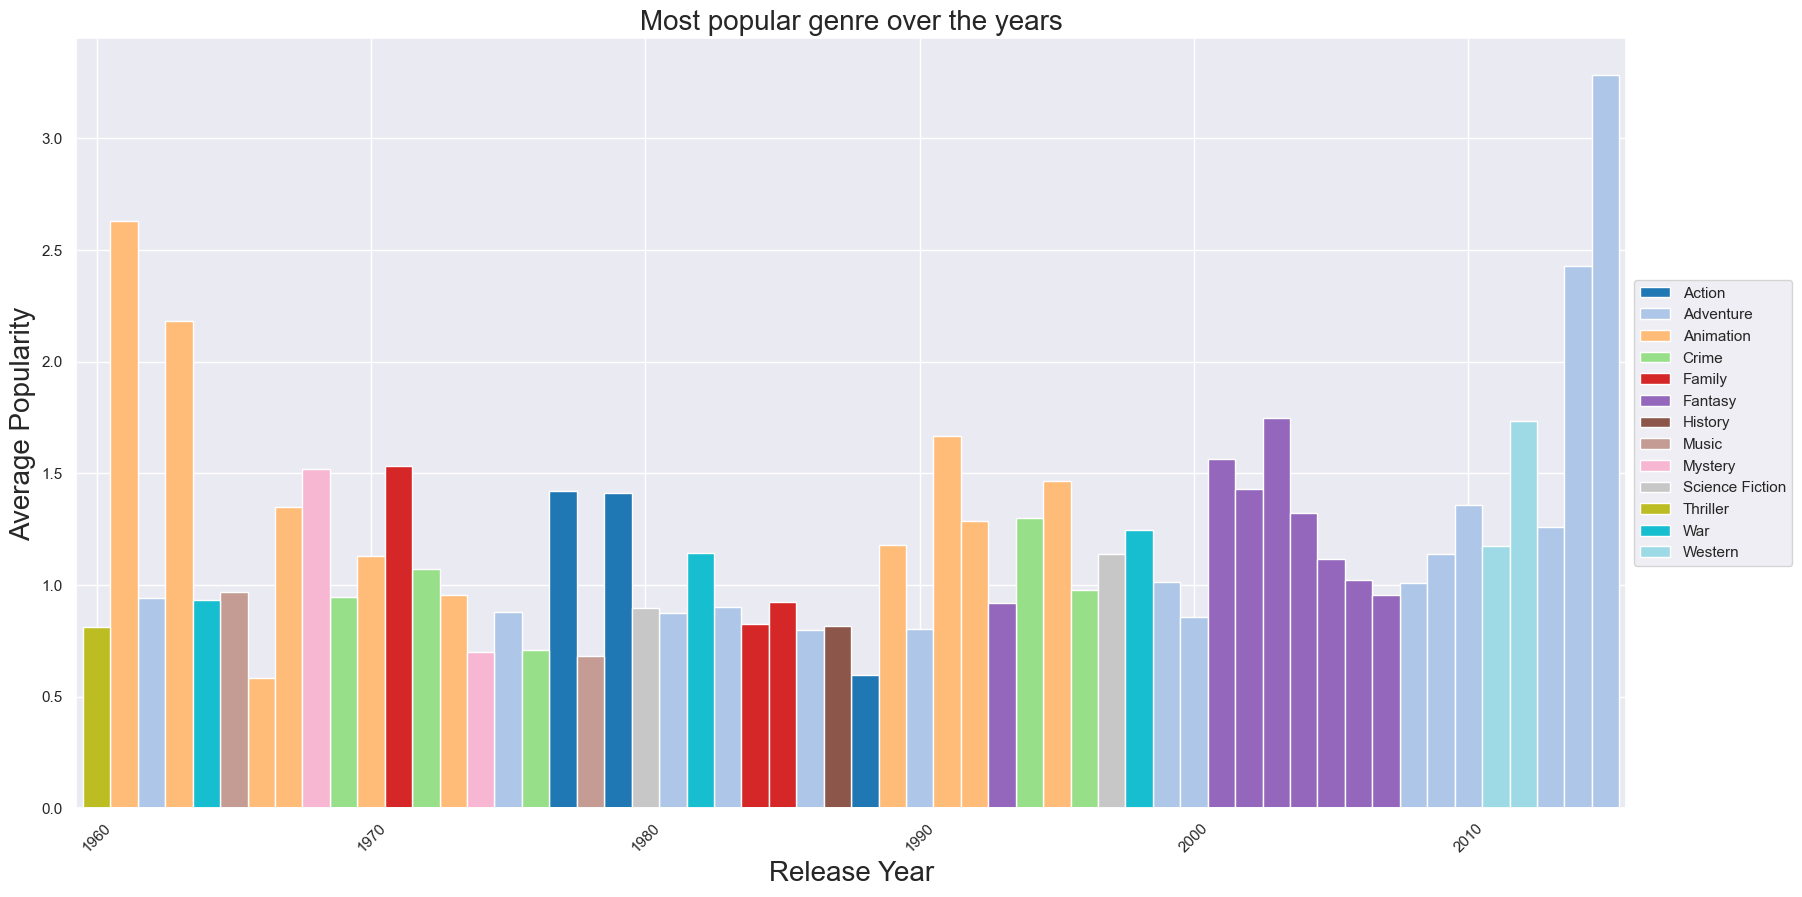

In [110]:
# plot by using pandas plot
ax = genres_popularity_exploded.unstack().fillna(0).plot(kind='bar', stacked=True, width=1, figsize=(20, 10), colormap='tab20', rot=45);

plt.title('Most popular genre over the years', fontsize=20);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));
ax.set_xlabel('Release Year', fontsize=20)
ax.set_ylabel('Average Popularity', fontsize=20)
ticks = ax.xaxis.get_ticklocs();
ax.xaxis.set_ticks(ticks[::10]);

> Second trial is by using matplotlib's pyplot.
> Firstly, the x axis (locations) is created, along with the legend (does not have the unique values).
> Then the plot itself, which has the desired form, but lacks information about the identity of the bar. Unfortunately, it is not readable at all, one could add bar labels, but readability would not improve too much.

In [115]:
x_axis = genres_popularity_exploded.index.get_level_values('release_year')
legend =genres_popularity_exploded.index.get_level_values('genres')

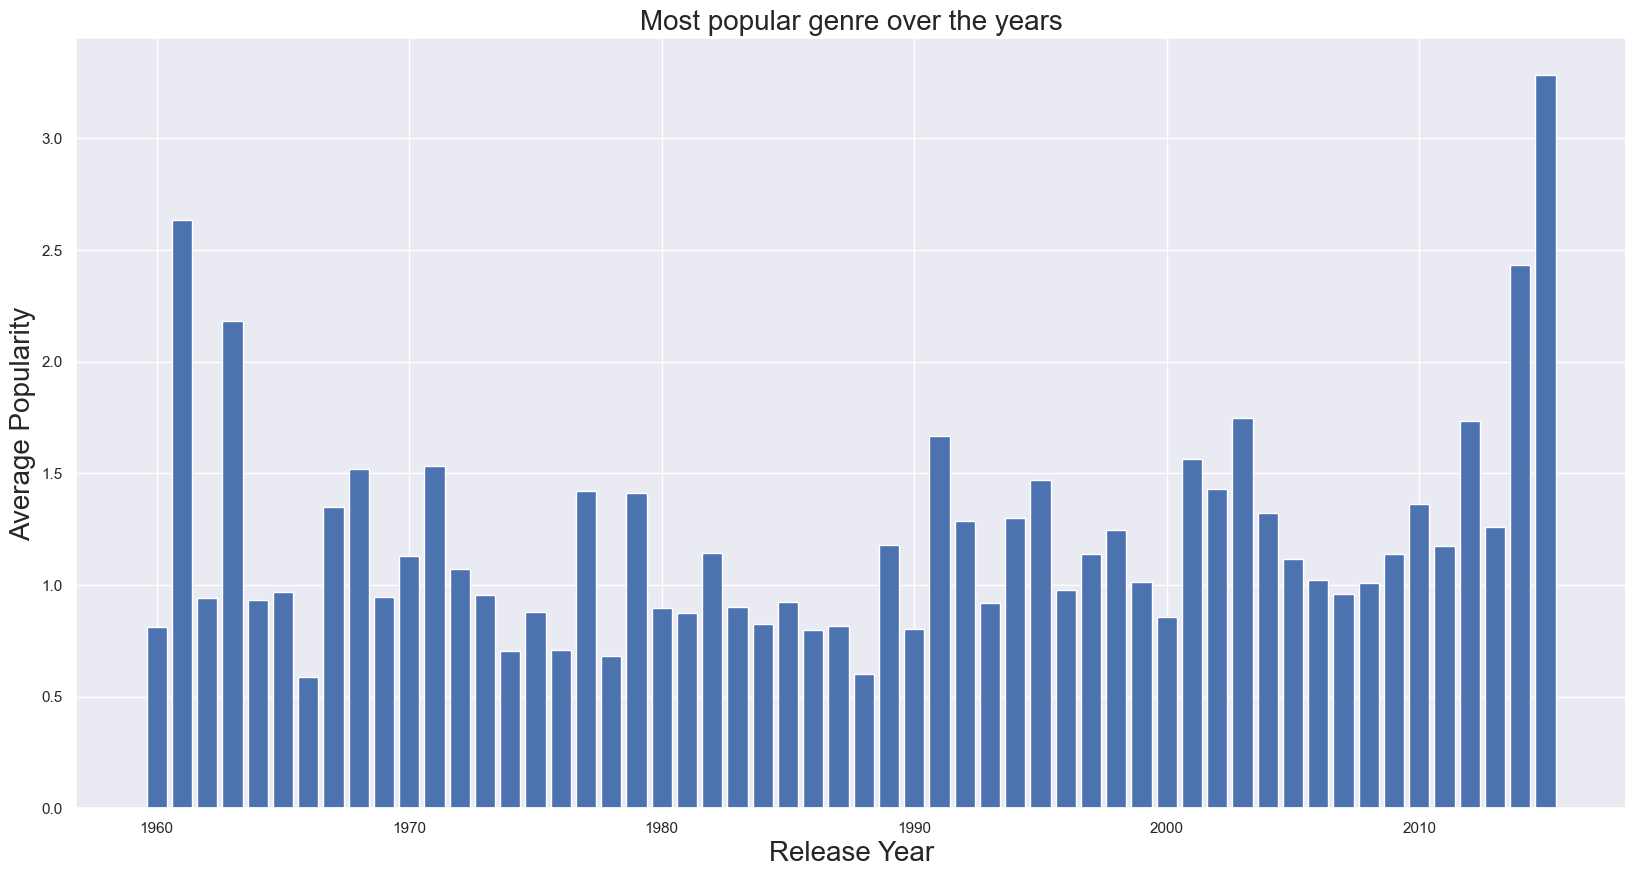

In [118]:
# plot using matplotlib's functionality
sns.set()
plt.subplots(figsize=(20, 10))
plt.bar(x_axis, genres_popularity_exploded, label =legend)
plt.title('Most popular genre over the years', fontsize=20)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Average Popularity', fontsize=20);
plt.show()

> So far, Series and not df were used to create the graphs.

> For the next one, using seaborn's *relplot*, we will plot the scatter of the same parameters, but before doing that we must convert the series to pandas df.

In [25]:
# create data frame to be able to plot the heatmap
genres_popularity_exploded_df = pd.DataFrame({'release_year':x_axis, 'genres':legend,
                                              'popularity':genres_popularity_exploded.values})
genres_popularity_exploded_df

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959
5,1965,Music,0.968850
6,1966,Animation,0.585717
7,1967,Animation,1.348805
8,1968,Mystery,1.519456
9,1969,Crime,0.948020


> Using seaborn to plot **The most popular genre by Release Year**

> It may not be as intuitive as the bar plot, but we can correctly plot datapoinst without any overlaying due to the width, whilr keeping the coloring of each genre.

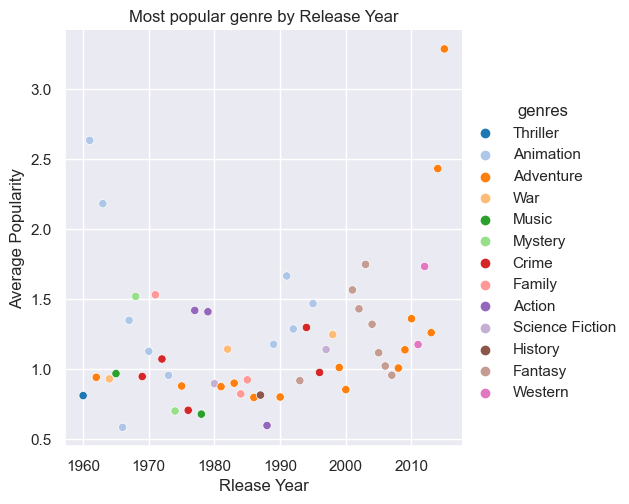

In [26]:
ax = sns.relplot(genres_popularity_exploded_df, x='release_year', y='popularity',
                 kind="scatter", hue='genres', palette ="tab20" ,markers=True)#, palette="ch:r=-.5,l=.75")      #hue="genres", markers=["o", "s", "D"], palette="Set2")
ax.set(xlabel='Rlease Year', ylabel='Average Popularity', title='Most popular genre by Release Year')

plt.show()

> Based on the above plot we can say that starting with the year 2000 there are 3 different genres dominating the market.
> - **fantasy** with over 7 years in a row
> - **adventure** steadily going up and even taking the top spot of the last 2 years
> - **western** popping up twice and for the first time

> Another way to look at this is to count how many times a genre has topped the year.

> In 25% of the years **adventure** was the most popular genres, followed by **animation** and **fantasy**.

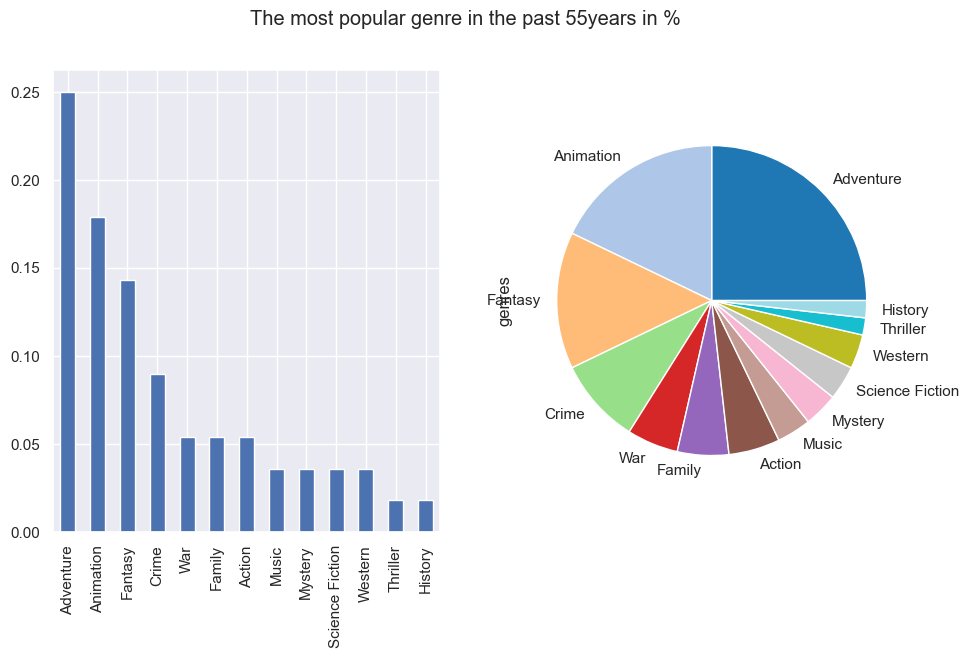

In [27]:
# counting how many times a given genres has topped the year
# the plot a bar graph
max_size = genres_popularity_exploded_df['genres'].count()
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

fig.suptitle('The most popular genre in the past 55years in %')
genres_popularity_exploded_df['genres'].value_counts().div(max_size).plot(kind='bar',
                                                                          ax= ax1);
genres_popularity_exploded_df['genres'].value_counts().div(max_size).plot(kind='pie',
                                                                          colormap='tab20',
                                                                          ax= ax2,
                                                                         figsize=(11,6));

In [28]:
# reshape data for heatmap
reshaped_res = genres_popularity_exploded_df.set_index(['release_year', 'genres'])['popularity'].unstack('genres')

> Perhaps, an even better way to visualize the **popularity** of different **genres** over the **years** is to check the below heatmap of:
> 1. the **most popular genre** by year
> 2. popularity of **each genre** by year

In [29]:
reshaped_res

genres,Action,Adventure,Animation,Crime,Family,Fantasy,History,Music,Mystery,Science Fiction,Thriller,War,Western
release_year,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.81191,NaN,NaN
1961,NaN,NaN,2.631987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,0.942513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,2.180410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930959,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.968850,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,0.585717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,1.348805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.519456,NaN,NaN,NaN,NaN


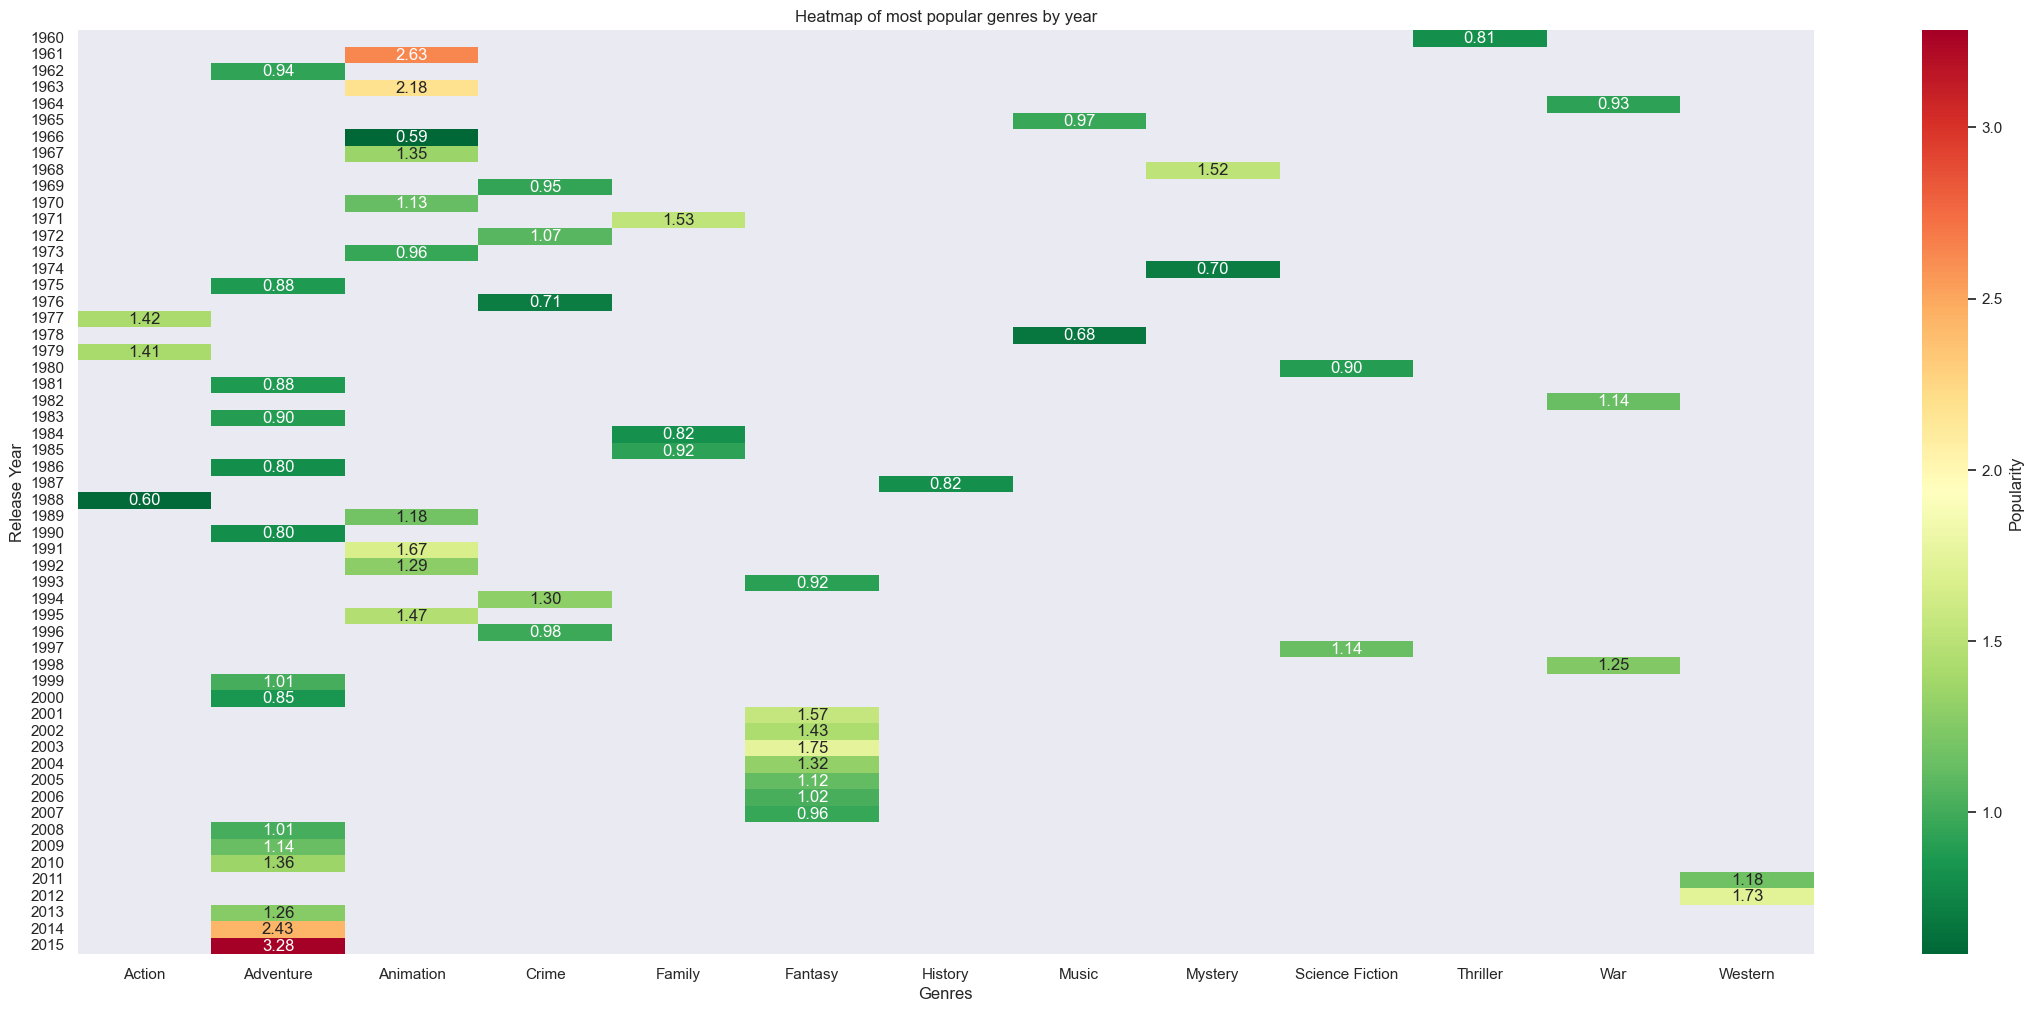

In [30]:
# plot heatmap
plt.figure(figsize=[28,12])
ax = sns.heatmap(reshaped_res, annot=True, fmt=".2f", cmap="RdYlGn_r", cbar_kws={'label': 'Popularity'});
ax.set(xlabel='Genres', ylabel='Release Year', title='Heatmap of most popular genres by year');

In [31]:
genres_popularity_exploded_2 = genres_popularity.explode('genres')
genres_popularity_exploded_2 = genres_popularity_exploded_2.groupby(['release_year', 'genres']).mean()['popularity']

genres_popularity_exploded_df_2 = pd.DataFrame({'release_year':genres_popularity_exploded_2.index.get_level_values('release_year'), 
                                                 'genres':genres_popularity_exploded_2.index.get_level_values('genres'), 
                                                 'popularity':genres_popularity_exploded_2.values})

# reshape data for heatmap
reshaped_res2 = genres_popularity_exploded_df_2.set_index(['release_year', 'genres'])['popularity'].unstack('genres')

In [32]:
#ax = sns.relplot(genres_popularity_exploded_df_2, x='release_year', y='popularity',
#             kind="line", hue='genres', markers=True)

#plt.show()

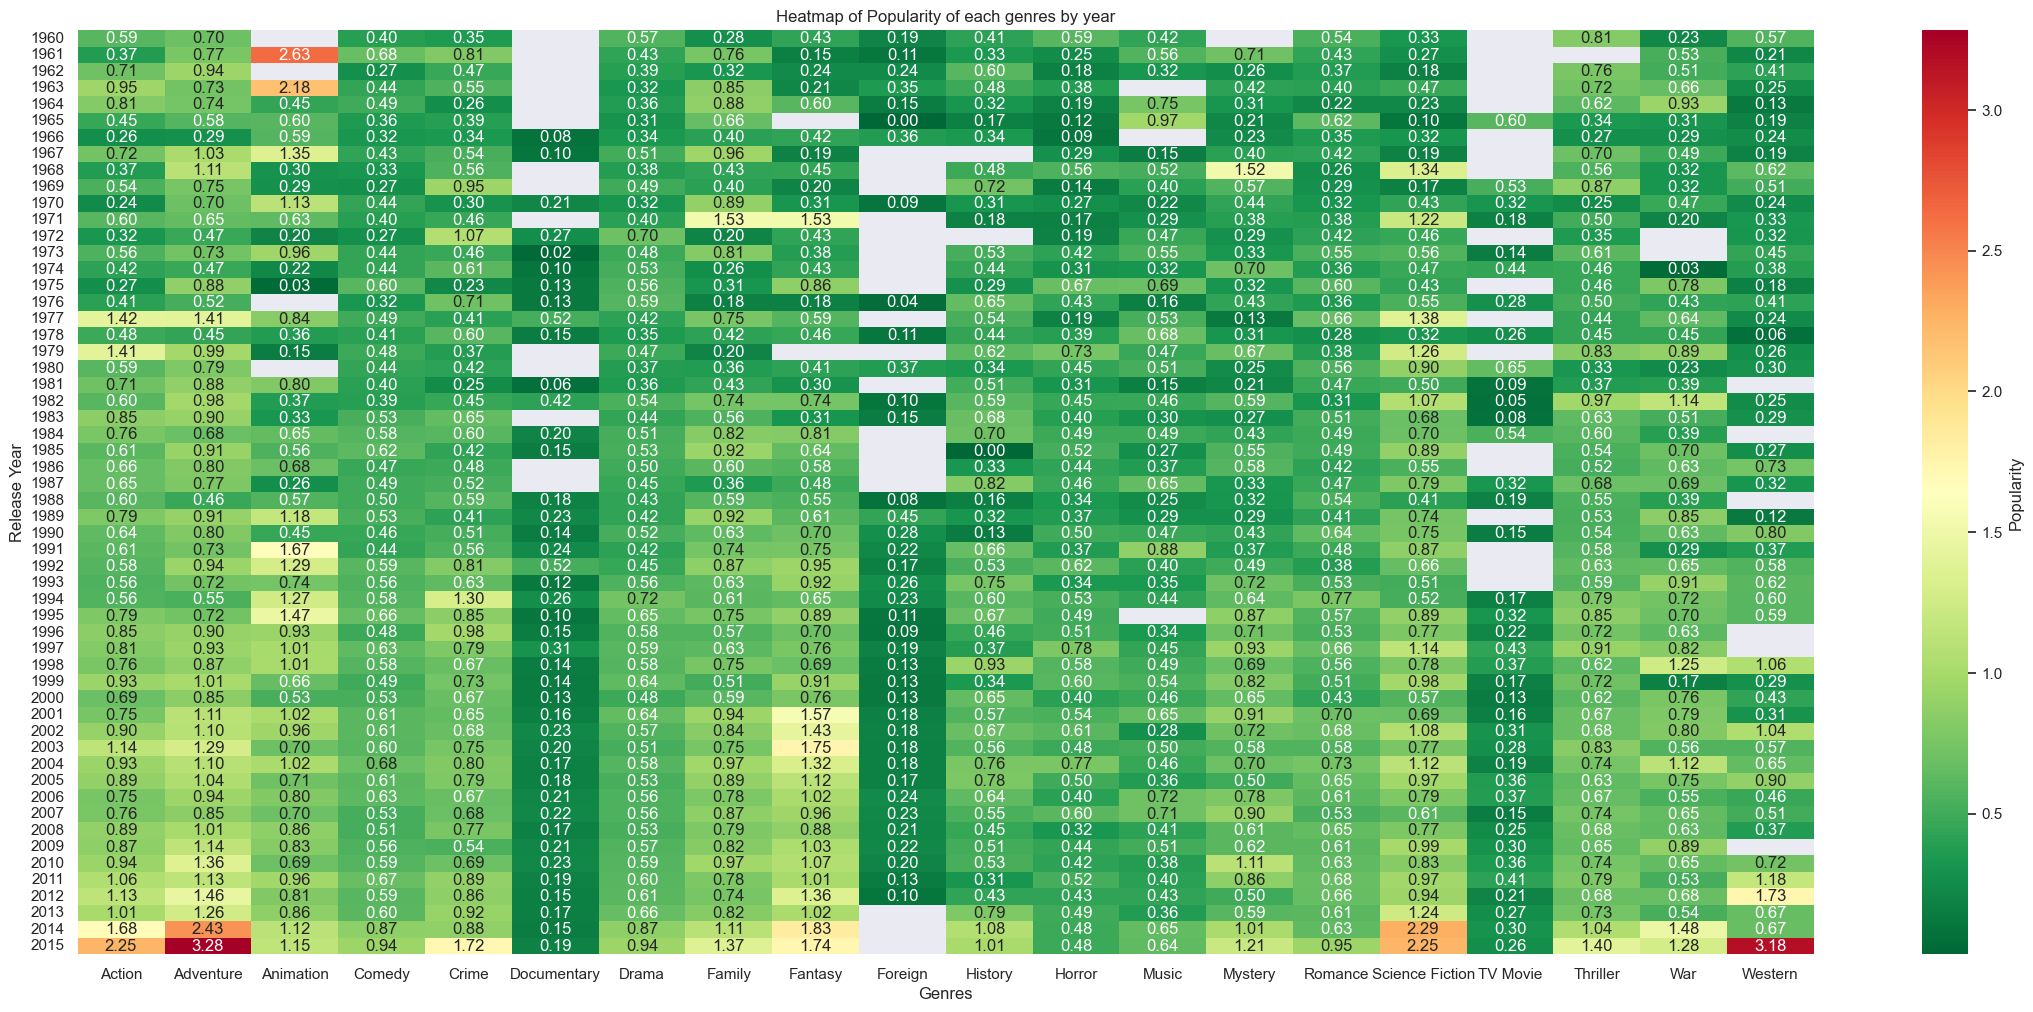

In [33]:
# plot heatmap
plt.figure(figsize=[28,12])
ax = sns.heatmap(reshaped_res2, annot=True, fmt=".2f", cmap="RdYlGn_r", cbar_kws={'label': 'Popularity'});

ax.set(xlabel='Genres', ylabel='Release Year', title='Heatmap of Popularity of each genres by year');

### Q1 observations

   1. Genres
    - *TV movie*
    - *romance*
    - *horror*
    - *foreign*
    - *drama*
    - *documentary*
    - *comedy*
    
        have never been the most popular in 56 years and they also have a constant low level of **popularity**
 
   2. The most popular genre over the years is **adventure**. 
   
   3. **Animation** seems to be constant, neither at a low level of **popularity**, nor at a high level.
   4. Along with **adventure**, **action**, **science fiction** and **fantasy** have been steadily increasing.
    


<a id='wrangling_q2'></a>
## **Q2.** Data Wrangling of Q2

### Research Question 2  - What kind of properties are associated with the movies that have high revenue?


>To answer the above question, I will use the above cleaned data frame.

> the dataframe is called *revenue_df* and by using the query it will contain those movies, whose adjusted budget and revenue are > 0, meaning that the new dataset will be composed based of movies where there is valid data.

In [34]:
# To answer the question "What kinds of properties are associated with movies that have high revenues?"
# i will need a different dataset where i must remove the movies wivth null values for budget and revenue budget 
revenue_df = df.query('budget_adj >0 and revenue_adj >0 ')

In [35]:
revenue_df= revenue_df.dropna()

In [36]:
# Continue to explore the data to address your additional research questions. 
revenue_df.info()
revenue_df.describe()
#revenue_df.head(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3677 entries, 135397 to 2161
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3677 non-null   float64       
 1   budget                3677 non-null   float64       
 2   revenue               3677 non-null   float64       
 3   original_title        3677 non-null   object        
 4   cast                  3677 non-null   object        
 5   director              3677 non-null   object        
 6   keywords              3677 non-null   object        
 7   runtime               3677 non-null   int64         
 8   genres                3677 non-null   object        
 9   production_companies  3677 non-null   object        
 10  release_date          3677 non-null   datetime64[ns]
 11  vote_count            3677 non-null   int64         
 12  vote_average          3677 non-null   float64       
 13  release_year 

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03,3677.000000
mean,1.226051,38.114653,111.440523,109.561327,547.702203,6.182758,2001.091923,4.538793e+01,142.088762
std,1.498897,42.675770,179.362521,19.855075,894.954704,0.789610,11.380391,4.519195e+01,219.515795
min,0.010335,0.000001,0.000002,26.000000,10.000000,2.200000,1960.000000,9.693980e-07,0.000003
25%,0.481276,10.000000,14.899417,96.000000,78.000000,5.700000,1995.000000,1.381637e+01,20.413161
50%,0.830597,25.000000,48.063435,106.000000,219.000000,6.200000,2004.000000,3.108049e+01,65.507272
75%,1.411147,50.000000,129.832389,120.000000,596.000000,6.700000,2010.000000,6.216097e+01,170.439892
max,32.985763,425.000000,2781.505847,338.000000,9767.000000,8.400000,2015.000000,4.250000e+02,2827.123750


> To better understand what kind of properties are associated with high revenue movies, I decided to create 2 new columns called `profit_adj` and `profit_adj_perc`:

>- `profit_adj` is the difference between `revenue_adj` and `budget_adj`
>- `profit_adj_perc` is the `profit_adj` but in percentage
     

In [37]:
revenue_df['profit_adj']= revenue_df['revenue_adj']-revenue_df['budget_adj']

In [38]:
revenue_df['profit_adj_perc']= (revenue_df['profit_adj']/revenue_df['budget_adj'])*100

>Inspect the newly created columns

In [39]:
revenue_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_perc
count,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3677.000000,3.677000e+03,3677.000000,3677.000000,3.677000e+03
mean,1.226051,38.114653,111.440523,109.561327,547.702203,6.182758,2001.091923,4.538793e+01,142.088762,96.700827,3.112937e+04
std,1.498897,42.675770,179.362521,19.855075,894.954704,0.789610,11.380391,4.519195e+01,219.515795,197.540101,1.683363e+06
min,0.010335,0.000001,0.000002,26.000000,10.000000,2.200000,1960.000000,9.693980e-07,0.000003,-413.912431,-9.999998e+01
25%,0.481276,10.000000,14.899417,96.000000,78.000000,5.700000,1995.000000,1.381637e+01,20.413161,-0.912508,-7.765698e+00
50%,0.830597,25.000000,48.063435,106.000000,219.000000,6.200000,2004.000000,3.108049e+01,65.507272,30.233376,1.162439e+02
75%,1.411147,50.000000,129.832389,120.000000,596.000000,6.700000,2010.000000,6.216097e+01,170.439892,113.029801,3.269134e+02
max,32.985763,425.000000,2781.505847,338.000000,9767.000000,8.400000,2015.000000,4.250000e+02,2827.123750,2750.136651,1.018618e+08


We will finally get the first info about the dataset, `Star Wars` released in `1977` has the highest `profit_adj` of **2.75B$**.

Next, we want to check if the same movie has the highest *percentage* wise `profit_adj`.

To our suprise, a different movie pops up, `The Karate Kid, Part II`, but there seems to be something strange about it, the `budget` is equal to the `runtime`. That has to be investigated! 

In [40]:
idx = revenue_df.profit_adj.idxmax()
revenue_df.loc[idx]

popularity                                                      12.037933
budget                                                               11.0
revenue                                                        775.398007
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
keywords                      android|galaxy|hermit|death star|lightsaber
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                          

In [41]:
idx = revenue_df.profit_adj_perc.idxmax()
revenue_df.loc[idx]

popularity                                                       0.772494
budget                                                           0.000113
revenue                                                        115.103979
original_title                                    The Karate Kid, Part II
cast                    Ralph Macchio|Pat Morita|Martin Kove|Charlie T...
director                                                 John G. Avildsen
keywords                 martial arts|karate|okinawa|revanche|self esteem
runtime                                                               113
genres                              Adventure|Drama|Action|Romance|Family
production_companies    Columbia Pictures Corporation|Delphi V Product...
release_date                                          1986-06-18 00:00:00
vote_count                                                            211
vote_average                                                          5.8
release_year                          

>By using a query on the `budget` and `runtime` we can see that only 1 movie can be found.
>
>Therefore, since we have the `id` of the movie we can use it to drop the movie.

In [42]:
revenue_df.query('budget*1e+6 == runtime')

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_perc
id,,,,,,,,,,,,,,,,,,
8856,0.772494,0.000113,115.103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,John G. Avildsen,martial arts|karate|okinawa|revanche|self esteem,113,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,1986-06-18,211,5.8,1986,0.000225,228.988594,228.988369,1.018618e+08


In [43]:
# The Karate Kid, Part 2 comes out as the most profitable movie %wise,
# which is not true because the budget has the same value as the runtime
# therefore i decided to remove the movie
# to do that i made a query on the equality of budget and runtime, i got the id and used it to drop the row
revenue_df = revenue_df.drop(labels=8856)

>After the removal of the afore metioned movie, we check again which movie has the highest *percent* wise `profit_adj` and once again we get a movie whose `budget_adj` is quite small, a few hundreds, in comparison to the `revenue_adj`. This type of movie is an outlier, a data error, so we have to remove it/them. 

In [44]:
idx = revenue_df.profit_adj_perc.idxmax()
revenue_df.loc[idx]

popularity                                                       0.132713
budget                                                           0.000114
revenue                                                               6.7
original_title                                             Into the Night
cast                    Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...
director                                                      John Landis
keywords                       adultery|assassin|airport|daily life|chase
runtime                                                               115
genres                                              Comedy|Drama|Thriller
production_companies                                   Universal Pictures
release_date                                          1985-02-15 00:00:00
vote_count                                                             24
vote_average                                                          6.1
release_year                          

In [45]:
idx = revenue_df.profit_adj.idxmax()
revenue_df.loc[idx]

popularity                                                      12.037933
budget                                                               11.0
revenue                                                        775.398007
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
keywords                      android|galaxy|hermit|death star|lightsaber
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                          

After a couple of trials, I have decided to create a new query on the `budget`, where the values are greater than **10000$**.

And that's how I discovered that ` Paranormal Activity ` from `2007` is the most profitable movie in the world percentage wise.

In [46]:
# second clean up - after removing the karate kid movie
# the most profitable movie %wise is again a movie with a small budget and high revenue
# there is way too big discrepency, as a consequece a new query(DF) with budget > 1000$ is created
revenue_df = revenue_df.query('budget_adj > 0.01')

In [47]:
revenue_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_perc
count,3658.000000,3658.00000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3.658000e+03
mean,1.229931,38.31262,111.985129,109.595681,549.990432,6.184117,2001.103609,45.623679,142.759551,97.135871,1.058658e+03
std,1.501635,42.69774,179.658655,19.857346,896.647129,0.789275,11.387136,45.190322,219.856588,197.925931,2.697189e+04
min,0.010335,0.01000,0.000002,26.000000,10.000000,2.200000,1960.000000,0.015775,0.000003,-413.912431,-9.999998e+01
25%,0.484016,10.00000,15.320892,96.000000,78.000000,5.700000,1995.000000,14.040500,20.756909,-0.969106,-7.920772e+00
50%,0.834155,25.00000,48.487318,106.000000,221.500000,6.200000,2004.000000,31.302231,66.038104,30.882744,1.158380e+02
75%,1.412485,50.00000,130.710515,120.000000,600.000000,6.700000,2010.000000,62.160970,171.260838,114.076589,3.253283e+02
max,32.985763,425.00000,2781.505847,338.000000,9767.000000,8.400000,2015.000000,425.000000,2827.123750,2750.136651,1.288939e+06


In [48]:
idx = revenue_df.profit_adj_perc.idxmax()
revenue_df.loc[idx]

popularity                                                       1.120442
budget                                                              0.015
revenue                                                          193.3558
original_title                                        Paranormal Activity
cast                    Katie Featherston|Micah Sloat|Mark Fredrichs|A...
director                                                        Oren Peli
keywords                haunting|psychic|entity|demonic possession|fou...
runtime                                                                86
genres                                                     Horror|Mystery
production_companies                   Blumhouse Productions|Solana Films
release_date                                          2007-09-14 00:00:00
vote_count                                                            714
vote_average                                                          6.1
release_year                          

In [49]:
idx = revenue_df.profit_adj.idxmax()
revenue_df.loc[idx]

popularity                                                      12.037933
budget                                                               11.0
revenue                                                        775.398007
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
keywords                      android|galaxy|hermit|death star|lightsaber
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                          

>The final *clean up* step is to drop the columns `budget` and `revenue`, as the more usefull information is into `budget_adj` and `revenue_adj`.

In [50]:
# removing columns that may not bring any value to the analysis
revenue_df = revenue_df.drop(['budget', 'revenue'], axis=1)

In [51]:
revenue_df.head()
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3658 entries, 135397 to 2161
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3658 non-null   float64       
 1   original_title        3658 non-null   object        
 2   cast                  3658 non-null   object        
 3   director              3658 non-null   object        
 4   keywords              3658 non-null   object        
 5   runtime               3658 non-null   int64         
 6   genres                3658 non-null   object        
 7   production_companies  3658 non-null   object        
 8   release_date          3658 non-null   datetime64[ns]
 9   vote_count            3658 non-null   int64         
 10  vote_average          3658 non-null   float64       
 11  release_year          3658 non-null   int64         
 12  budget_adj            3658 non-null   float64       
 13  revenue_adj  

>For ease of usage, inspection and development:
>
>1. make a copy of the `revenue_df` --> `revenue_df_clean`
>2. sort the values *descending* by `profit_adj`

In [52]:
revenue_df_clean = revenue_df.copy()

In [53]:
revenue_df_clean.sort_values(by='profit_adj', ascending=False, inplace=True)

In [54]:
revenue_df_clean.head(100)

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_perc
id,,,,,,,,,,,,,,,,
11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,android|galaxy|hermit|death star|lightsaber,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,39.575591,2789.712242,2750.136651,6949.072791
19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,240.886903,2827.123750,2586.236848,1073.631159
597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,271.692064,2506.405735,2234.713671,822.517094
9552,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,exorcism|holy water|religion and supernatural|...,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,1973-12-26,1113,7.2,1973,39.289277,2167.324901,2128.035625,5416.326812
578,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,fishing|atlantic ocean|bathing|shipwreck|polic...,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,1975-06-18,1415,7.3,1975,28.362748,1907.005842,1878.643094,6623.628571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2.108338,Beverly Hills Cop,Eddie Murphy|Judge Reinhold|John Ashton|Ronny ...,Martin Brest,california|showdown|undercover|strip club|inve...,105,Action|Comedy|Crime,Paramount Pictures|Eddie Murphy Productions,1984-11-30,535,6.5,1984,31.485631,664.053943,632.568312,2009.069853
24021,1.546212,The Twilight Saga: Eclipse,Kristen Stewart|Robert Pattinson|Taylor Lautne...,David Slade,vampire|graduation|immortality|werewolf,124,Adventure|Fantasy|Drama|Romance,Summit Entertainment|Maverick Films|Imprint En...,2010-06-23,1331,5.9,2010,68.000000,698.491347,630.491347,927.193157
950,3.145562,Ice Age: The Meltdown,Ray Romano|John Leguizamo|Denis Leary|Queen La...,Carlos Saldanha,mammoth|sloth|ice age|barrier ice|ice melting,91,Animation|Family|Comedy|Adventure,Blue Sky Studios|Twentieth Century Fox Animation,2006-03-23,1775,6.4,2006,86.533533,714.919257,628.385725,726.175975


>Convert the columns that contain text, to columns containing lists - in case they have to be split(exploded).
>
>That will be of good use, if we want to check whether a given `genres`/`director`/`production_companies`/`director`/`keywords` >is the trait of more profitable movies.

In [55]:
# use the above column_split function on the dataframe and provide the name of the column you want to split in multiple columns
columns_to_list =['genres','cast','production_companies','keywords','director']

revenue_df_clean = str_to_list_col(revenue_df_clean, columns_to_list)

In [56]:
genres_list = np.unique([*itertools.chain.from_iterable(revenue_df_clean.genres)])
cast_list = np.unique([*itertools.chain.from_iterable(revenue_df_clean.cast)])
prod_comp_list = np.unique([*itertools.chain.from_iterable(revenue_df_clean.production_companies)])
keywords_list = np.unique([*itertools.chain.from_iterable(revenue_df_clean.keywords)])
director_list = np.unique([*itertools.chain.from_iterable(revenue_df_clean.director)])

>Now we have a bit of more info, there are:
>- 20 different **genres**
>- 6544 different **cast members**
>- 1684 different **directors**
>- 3124 different **production companies**
>- 4784 different **keywords**
>
>Out of this we conclude that, a movie can have multiple `genres`/`director`/`production_companies`/`director`/`keywords`

In [57]:
print("list size is:", len(genres_list))
genres_list

list size is: 20


array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype='<U15')

In [58]:
print("list size is:", len(cast_list))
cast_list

list size is: 6544


array(['50 Cent', 'A Martinez', 'A. Michael Baldwin', ...,
       'Ã“lafur Darri Ã“lafsson', 'Äá»— Thá»‹ Háº£i Yáº¿n',
       'à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ'], dtype='<U34')

In [59]:
print("list size is:", len(director_list))
director_list

list size is: 1684


array(['Aaron Blaise', 'Aaron Seltzer', 'Abe Sylvia', ...,
       'Zal Batmanglij', 'Zillah Bowes', 'Ã‰mile Gaudreault'],
      dtype='<U32')

In [60]:
print("list size is:", len(prod_comp_list))
prod_comp_list

list size is: 3132


array(['"DIA" Productions GmbH & Co. KG', '1019 Entertainment',
       '10th Hole Productions', ..., 'icon', 'platinum studios', 'uFilm'],
      dtype='<U67')

In [61]:
print("list size is:", len(keywords_list))
keywords_list

list size is: 4784


array(['15th century', '17th century', '18th century', ..., 'å§åº•è‚¥å¦ˆ',
       'ç»åœ°å¥¶éœ¸', 'è¶…çº§å¦ˆå¦ˆ'], dtype='<U57')

<a id='eda_q2'></a>
## Exploratory Data Analysis of Q2

>  **Computing statistics** and **creating visualizations** with the goal of addressing the research questions 



>The aim of this Chapter is to find an answer to the question: *What kinds of properties are associated with the movies that >have high revenue?*
>
>The main used tools are:
>- correlation plot/matrix
>- scatter plot
>- histogram plot

### Histogram of Average Vote

>Based on the cleaned revenue df the *Histogram of Average Vote* with a *step size of 0.2*
>
>Here we can conclude that *Avg Vote* follows the Gaussian distribution with a strong peak at 6.4
>
>Then the question comes, *Does Avg Vote correlate with the `profit_adj`?*

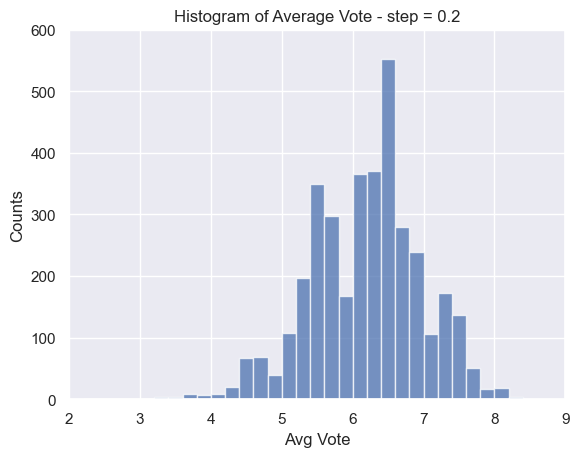

In [62]:
max_avg_vote = revenue_df_clean['vote_average'].max()
min_avg_vote = revenue_df_clean['vote_average'].min()
binning = (max_avg_vote-min_avg_vote)/0.2

n, bins, patches = plt.hist(revenue_df_clean['vote_average'], int(binning), facecolor='b', alpha=0.75)
plt.xlabel('Avg Vote')
plt.ylabel('Counts')
plt.title('Histogram of Average Vote - step = 0.2')
plt.xlim(2, 9)
plt.ylim(0, 600)
plt.grid(True)
plt.show()

### Profit adjusted vs Average Vote/Adjusted budget/Release year - scatter(corr)

>1. By plotting the adjusted profit against the *Average Vote*, it can be concluded that there is not much correlation between them. Yes, there are a few outliers, high profit and high Vote, but they are not representative fo the whole graph.
>
>2. The analysis continues with the graph of adjsuted profit vs adjusted budget, same as before, the correlation can't be spotted, although it seems to move on the right direction.  
>
>3. Lastly, the correlation with the release year, shows that they are not at all correlated.
>
>Given the amount of available parameters, we can't plot them one by one, the next paragraph will address a different way of looking at the correlation.

C:\Users\gavrilap\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


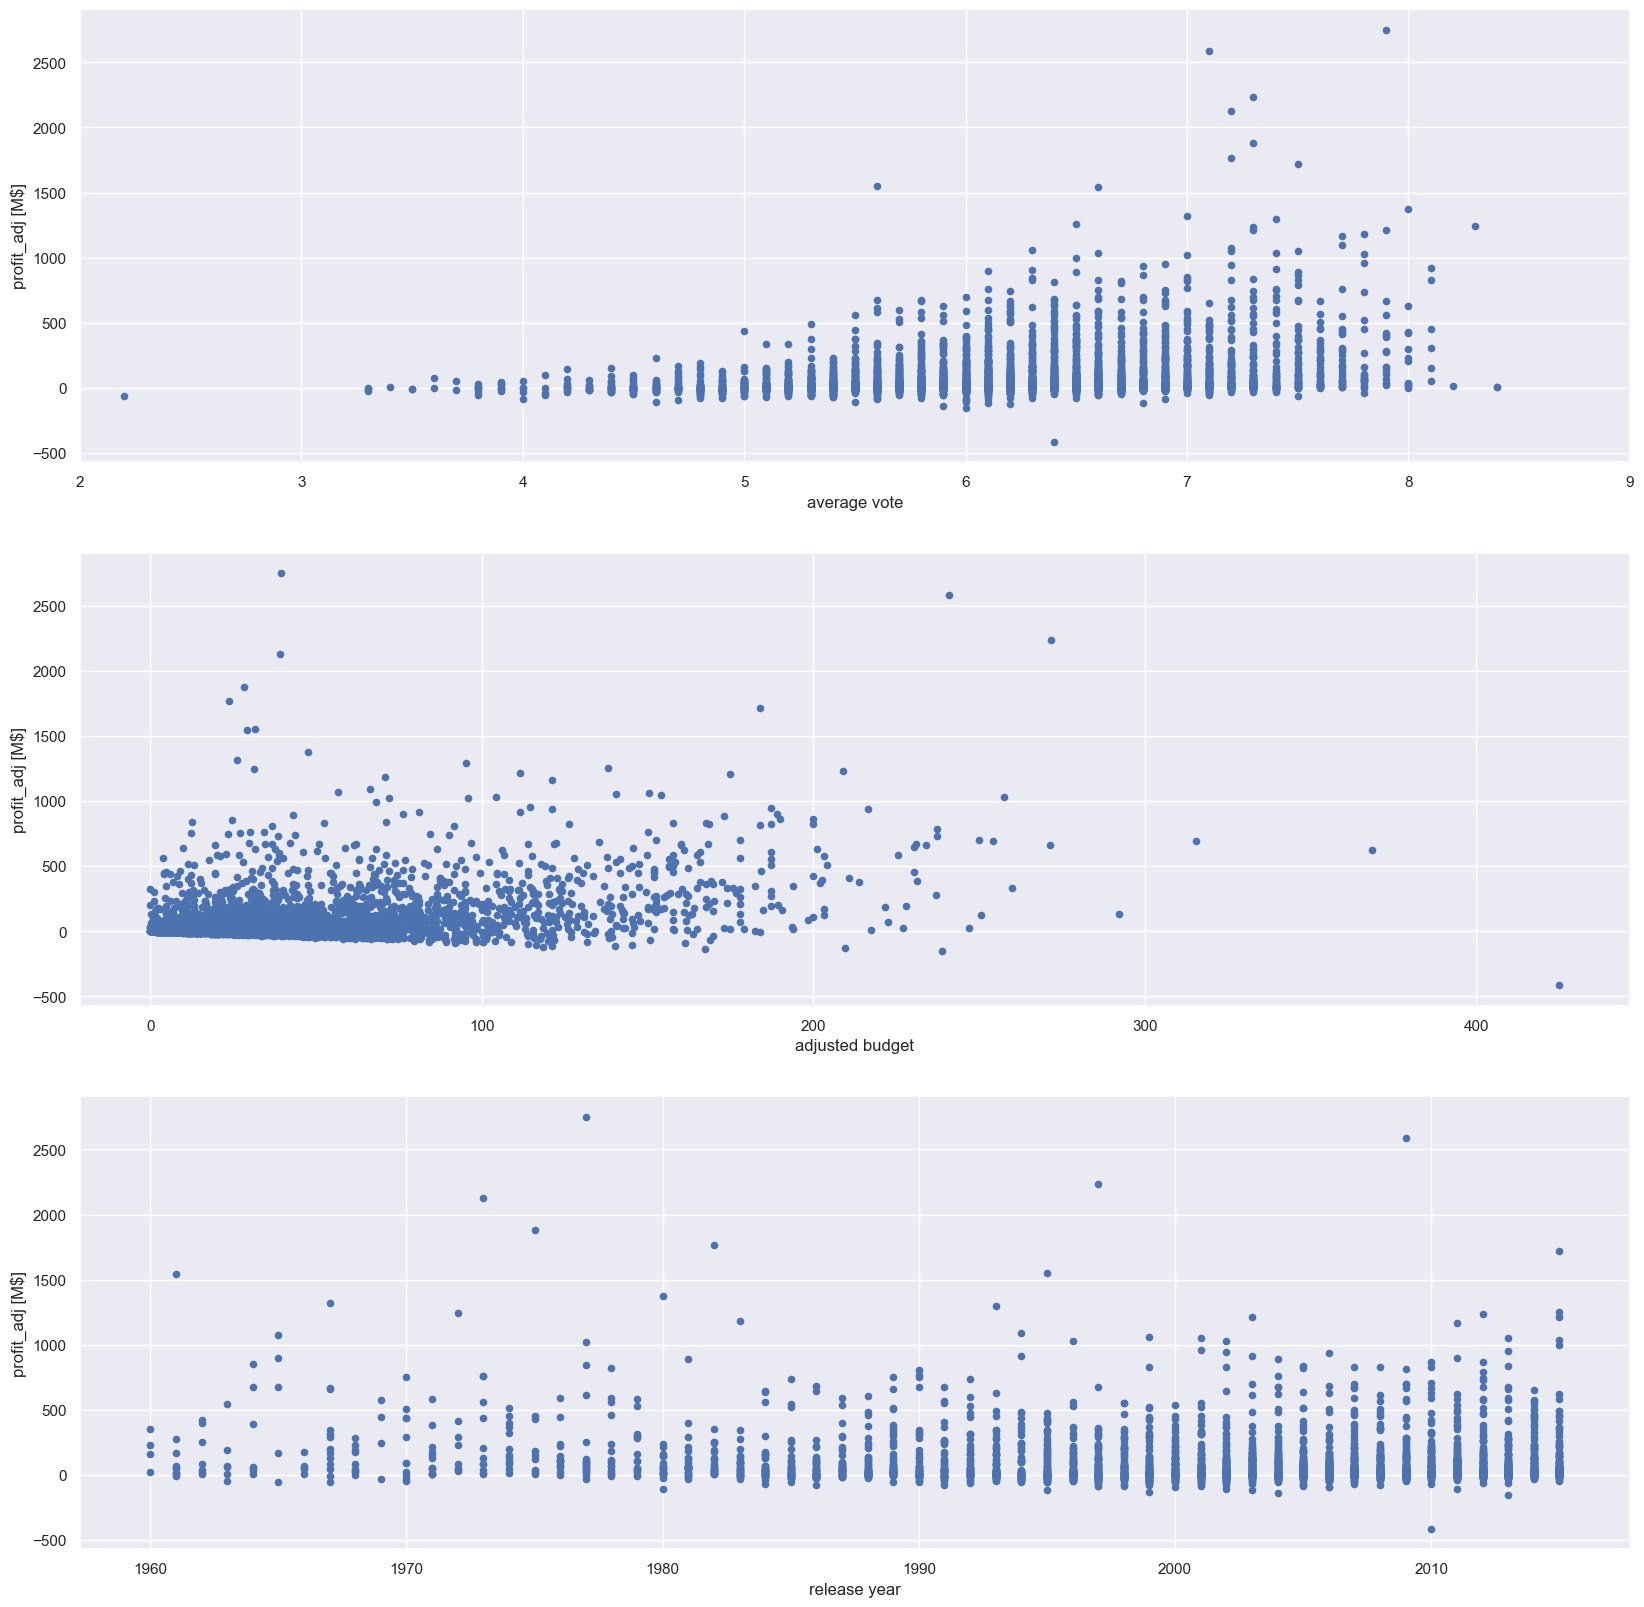

In [63]:
fig, axs = plt.subplots(3)

# 1
revenue_df_clean.plot(x="vote_average", y="profit_adj", kind="scatter", ax = axs[0], 
                      ylabel ="profit_adj [M$]", xlabel="average vote",
                      xlim=(2,9), figsize=(20,20));

# 2
revenue_df_clean.plot(x="budget_adj", y="profit_adj", kind="scatter", ax = axs[1],
                      ylabel ="profit_adj [M$]", xlabel ="adjusted budget",figsize=(20,20));

# 3
revenue_df_clean.plot(x="release_year", y="profit_adj", kind="scatter", ax = axs[2],
                     ylabel ="profit_adj [M$]", xlabel ="release year", figsize=(20,20));

### Correlation matrix

>Given the amount of parameters, best way to look at the correlation is to plot the correlation matrix chart.
>
>From the below chart, we can conclude that the profit/revenue adjusted are partially correlating with:
>- **vote count** - coef = 0.61 
>- **popularity** - coef = 0.51
>- **budget_adj** - coef = 0.40
>
>To conclude, you could possibly increase your revenue by gathering more votes or by making  the movie more popular or by >trying to increase your budget or by a combination of any of them. 

In [64]:
corr = revenue_df_clean.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\gavrilap\AppData\Local\Temp\ipykernel_137892\154524426.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_perc
popularity,1.00,0.21,0.78,0.32,0.18,0.39,0.54,0.51,-0.00
runtime,0.21,1.00,0.27,0.36,-0.11,0.33,0.28,0.23,-0.03
vote_count,0.78,0.27,1.00,0.39,0.22,0.49,0.65,0.61,0.00
vote_average,0.32,0.36,0.39,1.00,-0.14,0.03,0.27,0.29,0.01
release_year,0.18,-0.11,0.22,-0.14,1.00,0.09,-0.10,-0.13,-0.01
budget_adj,0.39,0.33,0.49,0.03,0.09,1.00,0.56,0.40,-0.03
revenue_adj,0.54,0.28,0.65,0.27,-0.10,0.56,1.00,0.98,0.02
profit_adj,0.51,0.23,0.61,0.29,-0.13,0.40,0.98,1.00,0.03
profit_adj_perc,-0.00,-0.03,0.00,0.01,-0.01,-0.03,0.02,0.03,1.00


>To visualize the above correlation coefficients in a graphical way, below are 2 ways:
>- using seaborn 
>- using matplotlib
>
>By observing the plots, it can be confirmed that `profit_adj` and `revenue_adj` have a really high correlation factor, but that's because they are almost the same thing. 
>
>Then, `vote_count` and `popularity` seem to correlate quite well.
>
>In conclusion, the above observation stands up, `vote_count`, `popularity` and in a smaller measure `budget_adj`(in relation to the `profit_adj` and not `revenue_adj`), are influecing/impacting the `profit_adj`/`revenue_adj`.

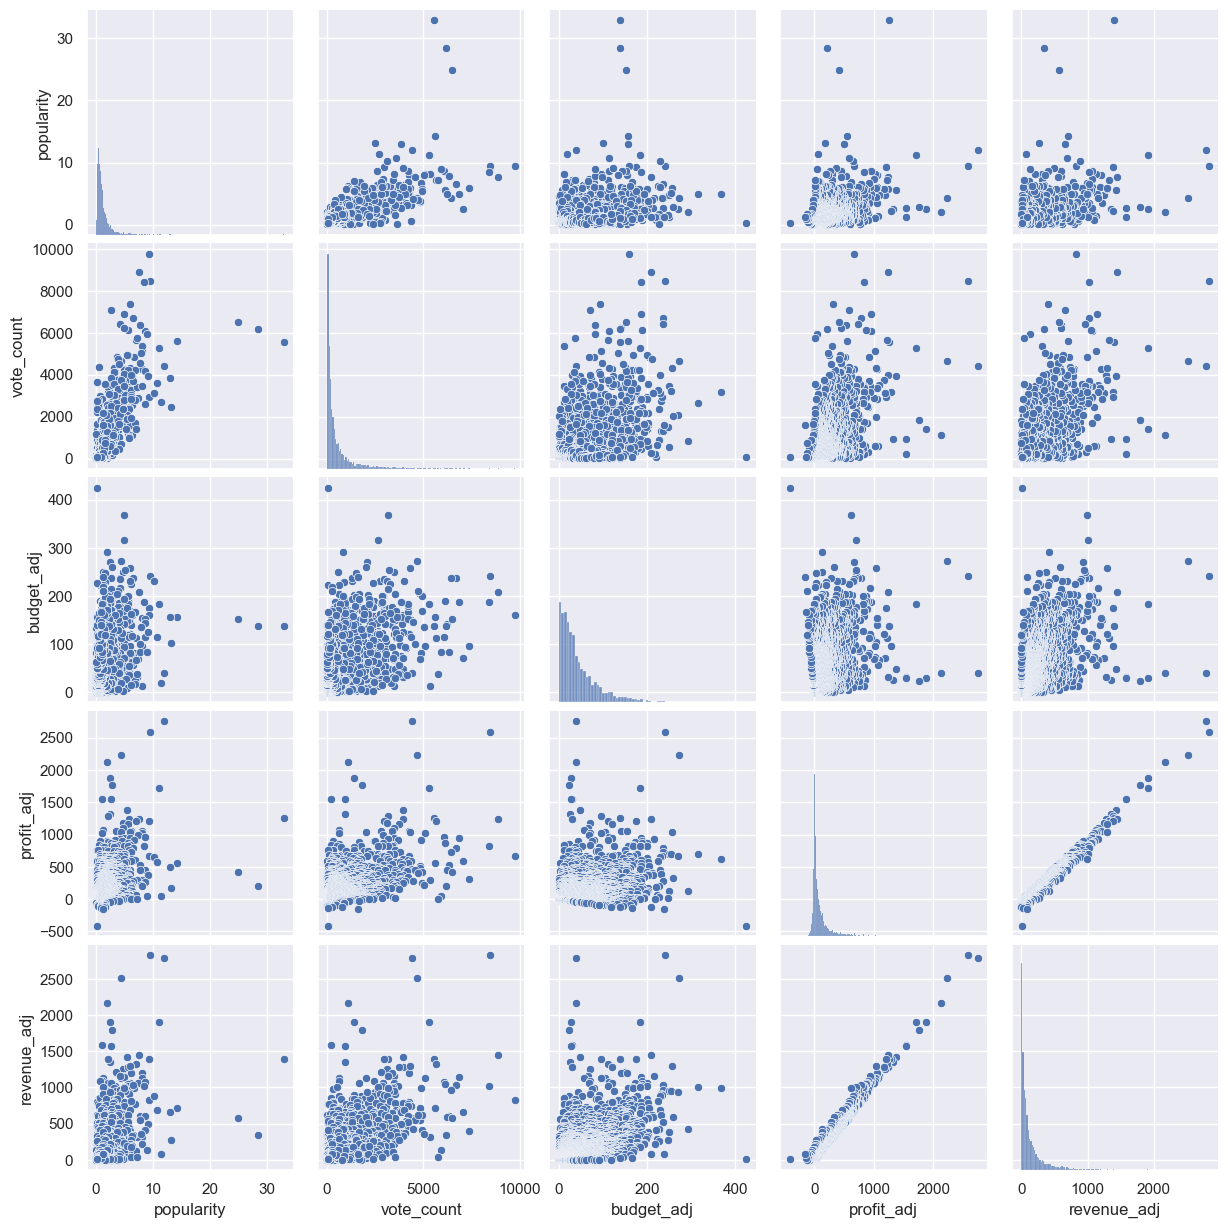

In [65]:
sns.pairplot(revenue_df_clean[['popularity', 'vote_count','budget_adj', 'profit_adj', 'revenue_adj']], 
             kind="scatter");      #hue="species", markers=["o", "s", "D"], palette="Set2")
plt.show()

### Explore the  Adjusted profit/revenue by Genres

> In this subchapter we want to take a look at the possible relation between the pair **genres** & **profit** and other parameters like **popularity**, **vote_count** or the movies themselves.

In [66]:
revenue_genres = revenue_df_clean.explode('genres')

In [67]:
revenue_genres.head()

,popularity,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj,profit_adj_perc
id,,,,,,,,,,,,,,,,
11,12.037933,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],"[android, galaxy, hermit, death star, lightsaber]",121,Adventure,"[Lucasfilm, Twentieth Century Fox Film Corpora...",1977-03-20,4428,7.9,1977,39.575591,2789.712242,2750.136651,6949.072791
11,12.037933,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],"[android, galaxy, hermit, death star, lightsaber]",121,Action,"[Lucasfilm, Twentieth Century Fox Film Corpora...",1977-03-20,4428,7.9,1977,39.575591,2789.712242,2750.136651,6949.072791
11,12.037933,Star Wars,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",[George Lucas],"[android, galaxy, hermit, death star, lightsaber]",121,Science Fiction,"[Lucasfilm, Twentieth Century Fox Film Corpora...",1977-03-20,4428,7.9,1977,39.575591,2789.712242,2750.136651,6949.072791
19995,9.432768,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon...",162,Action,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,8458,7.1,2009,240.886903,2827.123750,2586.236848,1073.631159
19995,9.432768,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],"[culture clash, future, space war, space colon...",162,Adventure,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,8458,7.1,2009,240.886903,2827.123750,2586.236848,1073.631159


>The `revenue_genres` data frame represents the revenue clean df, but expanded by **genres**, if a movie has 3 genres, then 3 instances of that movie for each genre will appear.
>
>Unfortunately, when plotting the graph `popularity` vs `profit_adj` over `genres`, only the last occurence of that movie can be seen on the graph. We observe that on the below chart, as we know that **Star Wars** tops the profit, with over 2.75B(dollars) and that it has 3 different genres, *Adventure*, *Action* and *Science Fiction*, but due to data point overlaying, only the last occurence is visible.
>
>That applies to the second graph as well.
>
>Although, the goal, of these 2 charts, is to try finding a relation between the **Profit_adj** and the pair **popularity** + **genres**  or **Profit_adj** and the pair **vote_count** + **genres** was not met, the correlation is still relatively high as shown in the correlation matrix.

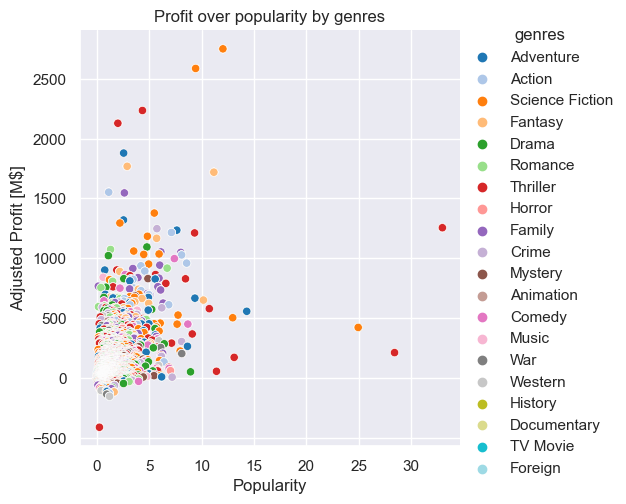

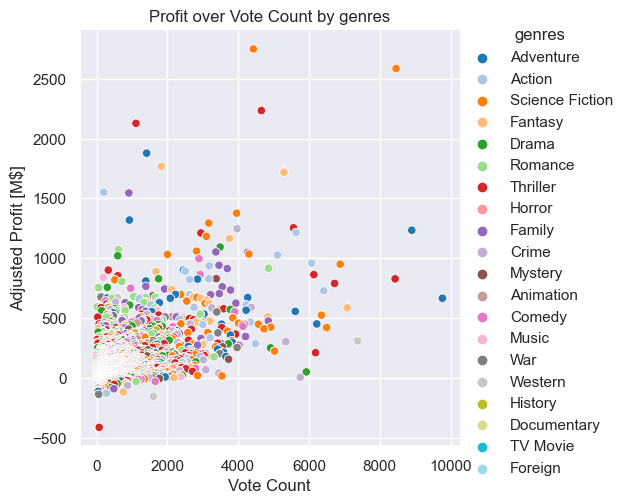

In [68]:
ax = sns.relplot(revenue_genres, x='popularity', y='profit_adj',
                 kind="scatter", hue='genres', markers=True, palette='tab20')#, palette="ch:r=-.5,l=.75")      #hue="genres", markers=["o", "s", "D"], palette="Set2")
ax.set(xlabel='Popularity', ylabel='Adjusted Profit [M$]', title='Profit over popularity by genres');

ax = sns.relplot(revenue_genres, x='vote_count', y='profit_adj',
                 kind="scatter", hue='genres', markers=True, palette='tab20')#, palette="ch:r=-.5,l=.75")      #hue="genres", markers=["o", "s", "D"], palette="Set2")
ax.set(xlabel='Vote Count', ylabel='Adjusted Profit [M$]', title='Profit over Vote Count by genres');

plt.show()

> To avoid the above described overlaying, the next scatter plot looks at the  Adjusted profit vs the genres.
>
> Although we can see really high values for the **Adventure**, **action** and **Science fiction**, that does not imply that they are the most profitable genres on average, as the majority of the movies can sit at the lower end.

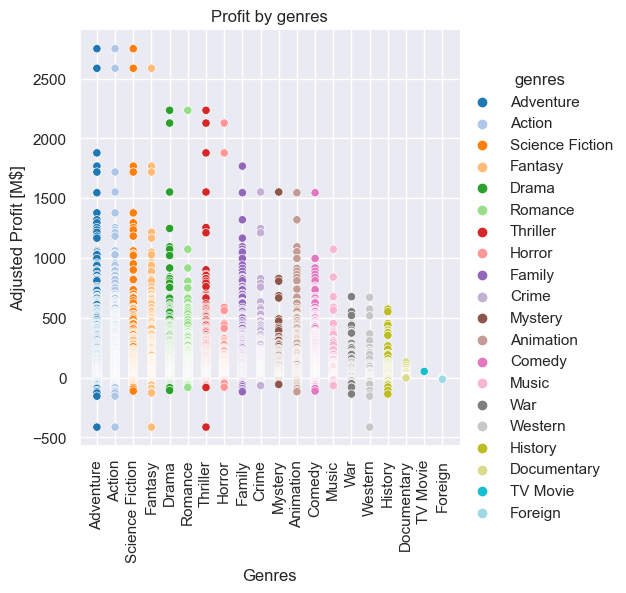

In [69]:
ax = sns.relplot(revenue_genres, x = 'genres', y='profit_adj',
             kind="scatter", hue='genres', markers=True, palette='tab20')#, palette="ch:r=-.5,l=.75")      #hue="genres", markers=["o", "s", "D"], palette="Set2")
ax.set(xlabel='Genres', ylabel='Adjusted Profit [M$]', title='Profit by genres');

plt.xticks(rotation=90);

> Coming from the above scatter plot, and going to the below bar plot of **Average adjusted Profit** vs **genres**, we can tell that indeed **adventure**, **action** and **science fiction** are not the most profitable genres (they are among those), but **animation** is.

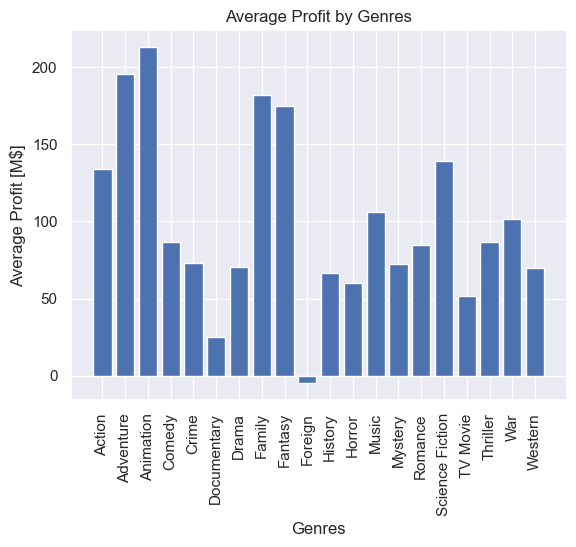

In [70]:
fig = plt.figure()

x_axis = np.arange(len(genres_list))

plt.bar(x_axis, revenue_genres.groupby('genres').mean()['profit_adj'], label =genres_list)
plt.title('Average Profit by Genres')
plt.xlabel('Genres')
plt.ylabel('Average Profit [M$]');
plt.xticks(x_axis, genres_list, rotation=90);

> We can conclude that looking at the genres, on average an Animation movie is the most profitable, followed by the Adventure, family, fantasy, Science fiction and Action. 

> Next, we group by genres and look into the average profit, popularity, budget and vote_count, while sorting descending the df by  **profit_adj**.

In [71]:
revenue_genres_gby2 = revenue_genres.groupby(['genres'])['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()

C:\Users\gavrilap\AppData\Local\Temp\ipykernel_137892\2626705578.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_genres_gby2 = revenue_genres.groupby(['genres'])['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()


In [72]:
revenue_genres_gby2.sort_values(by='profit_adj', ascending=False, inplace=True)

In [73]:
revenue_genres_gby2

,profit_adj,popularity,budget_adj,vote_count
genres,,,,
Animation,213.009011,1.751683,84.569515,913.938462
Adventure,195.776289,1.911173,82.878909,984.738227
Family,181.681912,1.522367,73.547705,716.506234
Fantasy,174.700518,1.788421,81.664139,923.717277
Science Fiction,139.086409,1.895506,66.557234,982.569745
Action,134.109369,1.613780,68.294312,835.782064
Music,106.236364,0.939256,36.822218,294.392000
War,101.303464,1.261136,58.441943,576.051724
Comedy,86.863468,1.055230,40.732521,417.354331


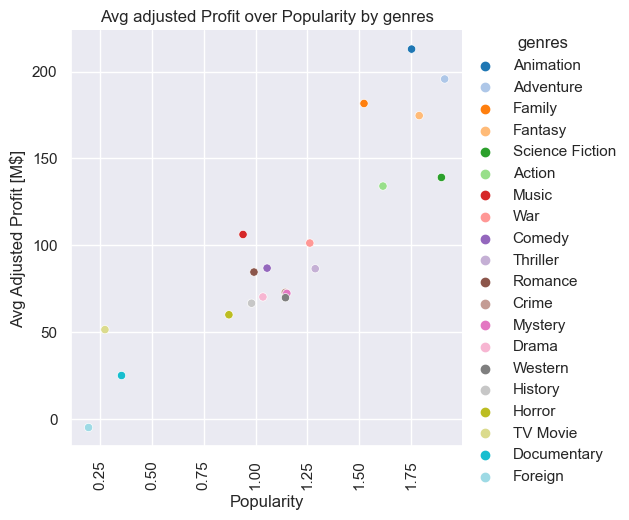

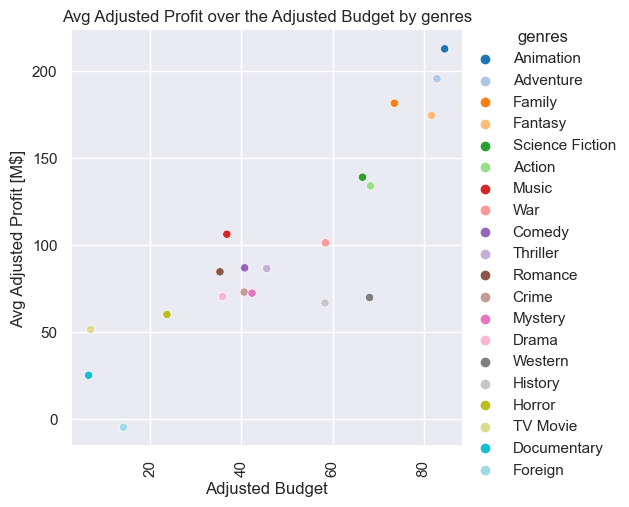

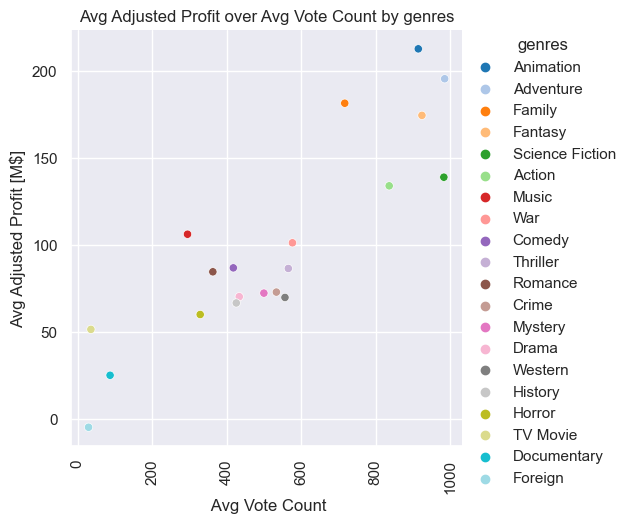

In [74]:
ax = sns.relplot(revenue_genres_gby2, x = 'popularity', y='profit_adj',
                 kind="scatter", hue='genres', markers=True, palette='tab20')
ax.set(xlabel='Popularity', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over Popularity by genres');
plt.xticks(rotation=90);

ax = sns.relplot(revenue_genres_gby2, x = 'budget_adj', y='profit_adj',
                 kind="scatter", hue='genres', markers=True, palette='tab20')
ax.set(xlabel='Adjusted Budget', ylabel='Avg Adjusted Profit [M$]', title='Avg Adjusted Profit over the Adjusted Budget by genres');
plt.xticks(rotation=90);

ax = sns.relplot(revenue_genres_gby2, x = 'vote_count', y='profit_adj',
                 kind="scatter", hue='genres', markers=True, palette='tab20')
ax.set(xlabel=' Avg Vote Count', ylabel='Avg Adjusted Profit [M$]', title='Avg Adjusted Profit over Avg Vote Count by genres');

plt.xticks(rotation=90);


> The outcome of the 3 scatter plots is that -> If you want to get higher profit/revenue you should aim for a movie covering one of the following genres: **Animation**, **Adventure**, **Family**, **Fantasy**, **Science Fiction** or **Action**, as they tend to have higher vote count, higher popularity, but they also require a higher budget.
>


### Explore the  Adjusted profit/revenue by Director

> In this subchapter we want to take a look at the possible relation between the pair **director** & **profit** and other parameters like **popularity**, **vote_count**, **adj_budget** or the movies themselves.

> The difference to the previous exploration is that there are much more directors than genres, therefore we will only consider the top 20 by *profit_adj*

In [75]:
revenue_director = revenue_df_clean.explode('director')
#revenue_director.info();
revenue_director = revenue_director.groupby('director')['profit_adj','popularity', 'budget_adj', 'vote_count'].mean() 
revenue_director.sort_values(by='profit_adj', ascending=False, inplace=True)


C:\Users\gavrilap\AppData\Local\Temp\ipykernel_137892\2623272396.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_director = revenue_director.groupby('director')['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()


In [76]:
revenue_director

,profit_adj,popularity,budget_adj,vote_count
director,,,,
Irwin Winkler,1551.568265,1.136610,31.481271,201.0
Clyde Geronimi,1545.635295,2.631987,29.179445,913.0
Hamilton Luske,1545.635295,2.631987,29.179445,913.0
Richard Marquand,1182.994738,4.828854,70.824243,3101.0
Jennifer Lee,1052.306488,6.112766,140.405003,3369.0
...,...,...,...,...
Michael Lehmann,-76.503290,0.977243,104.071035,155.0
John Bruno,-79.838230,0.654013,98.178963,60.0
Robert Walker,-118.534968,1.653031,118.535264,753.0


> Selecting the top 20 directors by profit, as there are too many to work with.

In [77]:
revenue_director_slice = revenue_director[:20]
revenue_director_slice.head(20)

,profit_adj,popularity,budget_adj,vote_count
director,,,,
Irwin Winkler,1551.568265,1.136610,31.481271,201.000000
Clyde Geronimi,1545.635295,2.631987,29.179445,913.000000
Hamilton Luske,1545.635295,2.631987,29.179445,913.000000
Richard Marquand,1182.994738,4.828854,70.824243,3101.000000
Jennifer Lee,1052.306488,6.112766,140.405003,3369.000000
George Lucas,974.026535,3.910306,78.293326,2116.500000
David Yates,848.607527,5.126634,195.756288,3454.750000
James Cameron,787.072295,3.559685,128.830312,2719.500000
Pierre Coffin,769.384333,5.041612,69.406168,3726.666667


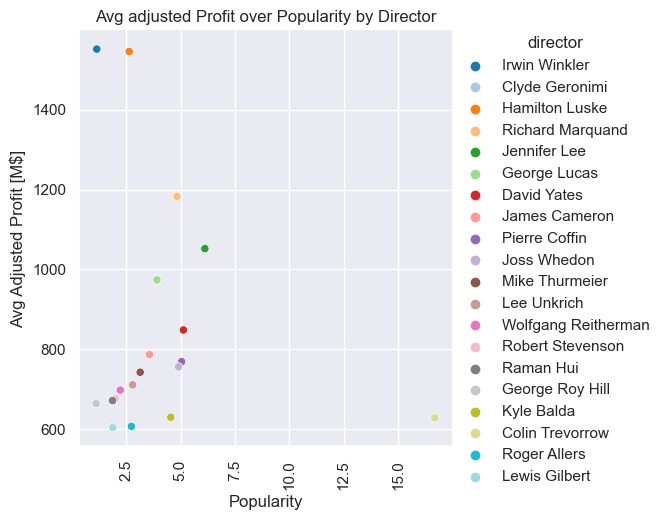

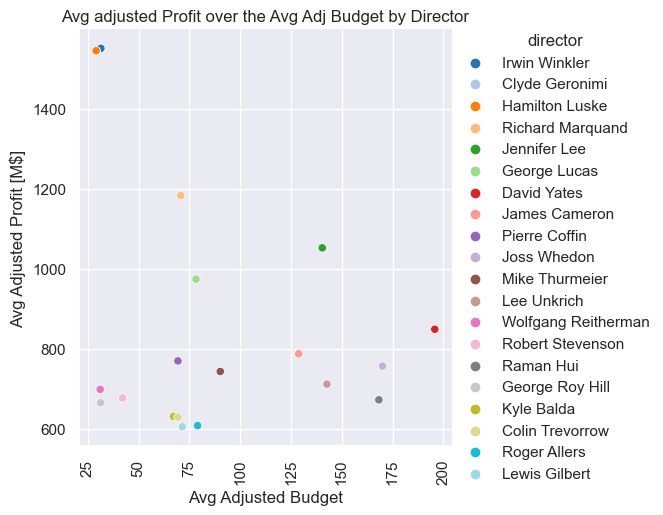

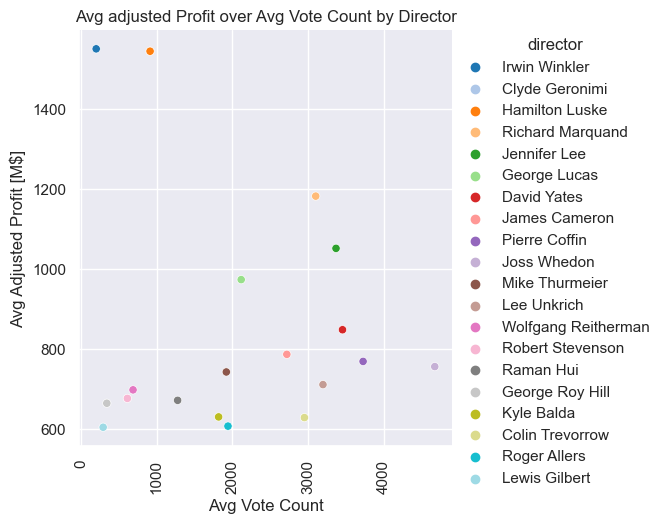

In [78]:
ax = sns.relplot(revenue_director_slice, x = 'popularity', y='profit_adj',
                 kind="scatter", hue='director', markers=True, palette='tab20')
ax.set(xlabel='Popularity', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over Popularity by Director');
plt.xticks(rotation=90)

ax = sns.relplot(revenue_director_slice, x = 'budget_adj', y='profit_adj',
                 kind="scatter", hue='director', markers=True, palette='tab20')
ax.set(xlabel='Avg Adjusted Budget', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over the Avg Adj Budget by Director');
plt.xticks(rotation=90);

ax = sns.relplot(revenue_director_slice, x = 'vote_count', y='profit_adj',
                 kind="scatter", hue='director', markers=True, palette='tab20')
ax.set(xlabel='Avg Vote Count', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over Avg Vote Count by Director');
plt.xticks(rotation=90);


> The outcome of the 3 scatter plots is that -> There does not seem to be high correlation between the avg **adj_profit** and **vote count** or **budget** or **popularity** over the ***directors***.
>


### Explore the  Adjusted profit/revenue by Production Companies

> In this subchapter we want to take a look at the possible relation between the pair **production_companies** & **profit** and other parameters like **popularity**, **vote_count**, **adj_budget** or the movies themselves.


> Once again we are walking one the footsteps of the previous 2 explorations.
>
> This time we will add a bit of extra information, besides grouping by `production_companies` and calculating different parameters, the count of movies is added my merging datasets.

In [79]:
revenue_prod_comp = revenue_df_clean.explode('production_companies')
revenue_prod_comp.info();
revenue_prod_comp = revenue_prod_comp.groupby('production_companies')['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()
revenue_prod_comp.sort_values(by='profit_adj', ascending=False, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10183 entries, 11 to 46528
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10183 non-null  float64       
 1   original_title        10183 non-null  object        
 2   cast                  10183 non-null  object        
 3   director              10183 non-null  object        
 4   keywords              10183 non-null  object        
 5   runtime               10183 non-null  int64         
 6   genres                10183 non-null  object        
 7   production_companies  10183 non-null  object        
 8   release_date          10183 non-null  datetime64[ns]
 9   vote_count            10183 non-null  int64         
 10  vote_average          10183 non-null  float64       
 11  release_year          10183 non-null  int64         
 12  budget_adj            10183 non-null  float64       
 13  revenue_adj    

C:\Users\gavrilap\AppData\Local\Temp\ipykernel_137892\3991997390.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_prod_comp = revenue_prod_comp.groupby('production_companies')['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()


> Data frame as resulting from grouping.

In [80]:
revenue_prod_comp

,profit_adj,popularity,budget_adj,vote_count
production_companies,,,,
Hoya Productions,2128.035625,2.010733,39.289277,1113.0
Truenorth Productions,1718.723211,11.173104,183.999919,5292.0
Alfran Productions,1246.626367,5.738034,31.287366,3970.0
Argyle Enterprises,1072.786240,1.313676,56.748622,620.0
Julia Phillips and Michael Phillips Productions,1021.009368,1.104816,71.955621,600.0
...,...,...,...,...
Lolita Productions,-82.784496,1.031334,84.224540,120.0
Screenland Pictures,-95.189608,0.385350,113.966290,42.0
Blind Wink Productions,-155.110171,1.214510,238.688505,1607.0


> Creating the production company counts

In [81]:
count_prod_comp = revenue_df_clean.explode('production_companies')
counts =count_prod_comp['production_companies'].value_counts().to_frame()

In [82]:
counts

,production_companies
Universal Pictures,320
Warner Bros.,318
Paramount Pictures,262
Twentieth Century Fox Film Corporation,196
Columbia Pictures,177
...,...
Compulsion Inc.,1
Splendid Medien AG,1
Studio Babelsberg StudioBabelsberg Motion Pictures,1
JVC Entertainment,1


> Rename the column to `movie counts` such that is distinguishable in the new dataset

In [83]:
counts.rename(columns={'production_companies': 'movie_counts'}, inplace=True)

> Merging the 2 datasets on the index

In [84]:
prod_comp_combined = pd.merge(revenue_prod_comp, counts, how="inner", left_index=True, right_index=True)

In [85]:
prod_comp_combined

,profit_adj,popularity,budget_adj,vote_count,movie_counts
Hoya Productions,2128.035625,2.010733,39.289277,1113.0,1
Truenorth Productions,1718.723211,11.173104,183.999919,5292.0,1
Alfran Productions,1246.626367,5.738034,31.287366,3970.0,1
Argyle Enterprises,1072.786240,1.313676,56.748622,620.0,1
Julia Phillips and Michael Phillips Productions,1021.009368,1.104816,71.955621,600.0,1
...,...,...,...,...,...
Lolita Productions,-82.784496,1.031334,84.224540,120.0,1
Screenland Pictures,-95.189608,0.385350,113.966290,42.0,1
Blind Wink Productions,-155.110171,1.214510,238.688505,1607.0,1
Silver Bullet Productions (II),-155.110171,1.214510,238.688505,1607.0,1


> Given the amount of production companies, we will try to narrow the list.
> Firstly, we select those companies that were involved in the production of movies with a profit > 1M dollars
> Going further, we select only companies involved in the production of more than 5 movies.
> there are still too many companies, as a consequence the top 20 by profit will be selected

In [86]:
prod_comp_combined = prod_comp_combined.query('profit_adj > 1') #those companies with an average profit > 1M$ 

In [87]:
prod_comp_combined

,profit_adj,popularity,budget_adj,vote_count,movie_counts
Hoya Productions,2128.035625,2.010733,39.289277,1113.00,1
Truenorth Productions,1718.723211,11.173104,183.999919,5292.00,1
Alfran Productions,1246.626367,5.738034,31.287366,3970.00,1
Argyle Enterprises,1072.786240,1.313676,56.748622,620.00,1
Julia Phillips and Michael Phillips Productions,1021.009368,1.104816,71.955621,600.00,1
...,...,...,...,...,...
IDG China Media,1.161558,0.263908,0.129904,12.00,1
Ultravi Productions,1.157614,1.133400,32.450075,256.00,1
HanWay Films,1.155719,0.934299,9.645500,265.50,4
Olympus Pictures,1.130992,0.650673,4.100000,138.50,2


In [88]:
prod_comp_combined = prod_comp_combined.query('movie_counts > 5') #those companies with more than 5 movie

In [89]:
prod_comp_combined

,profit_adj,popularity,budget_adj,vote_count,movie_counts
Lucasfilm,872.150102,4.050399,84.309729,2238.466667,15
Lightstorm Entertainment,835.353375,3.139564,154.581703,2480.000000,7
Heyday Films,647.958947,4.693828,133.056659,2969.076923,13
Danjaq,529.617433,2.706901,67.484754,810.500000,6
Marvel Studios,526.835913,6.800938,168.373369,4905.916667,12
...,...,...,...,...,...
Cannon Group,6.135203,0.624827,17.411454,76.666667,6
A24,5.719593,1.285562,5.920302,642.333333,6
Bel Air Entertainment,5.081091,0.730119,68.043915,142.833333,6
Killer Films,2.731916,0.904255,10.251036,212.375000,8


In [90]:
revenue_prod_comp_slice= prod_comp_combined[:20]

In [91]:
revenue_prod_comp_slice

,profit_adj,popularity,budget_adj,vote_count,movie_counts
Lucasfilm,872.150102,4.050399,84.309729,2238.466667,15
Lightstorm Entertainment,835.353375,3.139564,154.581703,2480.000000,7
Heyday Films,647.958947,4.693828,133.056659,2969.076923,13
Danjaq,529.617433,2.706901,67.484754,810.500000,6
Marvel Studios,526.835913,6.800938,168.373369,4905.916667,12
Pixar Animation Studios,500.652848,3.529800,150.439473,2819.437500,16
Eon Productions,482.085143,2.169917,75.332379,576.000000,21
WingNut Films,466.447158,4.167958,117.759222,2714.230769,13
Syncopy,430.151667,7.903816,156.281186,5642.125000,8
Blue Sky Studios,403.786166,2.377085,87.638931,1223.300000,10


> Add a name to the index column

In [92]:
revenue_prod_comp_slice.index.rename('production_companies', inplace=True)

In [93]:
revenue_prod_comp_slice

,profit_adj,popularity,budget_adj,vote_count,movie_counts
production_companies,,,,,
Lucasfilm,872.150102,4.050399,84.309729,2238.466667,15
Lightstorm Entertainment,835.353375,3.139564,154.581703,2480.000000,7
Heyday Films,647.958947,4.693828,133.056659,2969.076923,13
Danjaq,529.617433,2.706901,67.484754,810.500000,6
Marvel Studios,526.835913,6.800938,168.373369,4905.916667,12
Pixar Animation Studios,500.652848,3.529800,150.439473,2819.437500,16
Eon Productions,482.085143,2.169917,75.332379,576.000000,21
WingNut Films,466.447158,4.167958,117.759222,2714.230769,13
Syncopy,430.151667,7.903816,156.281186,5642.125000,8


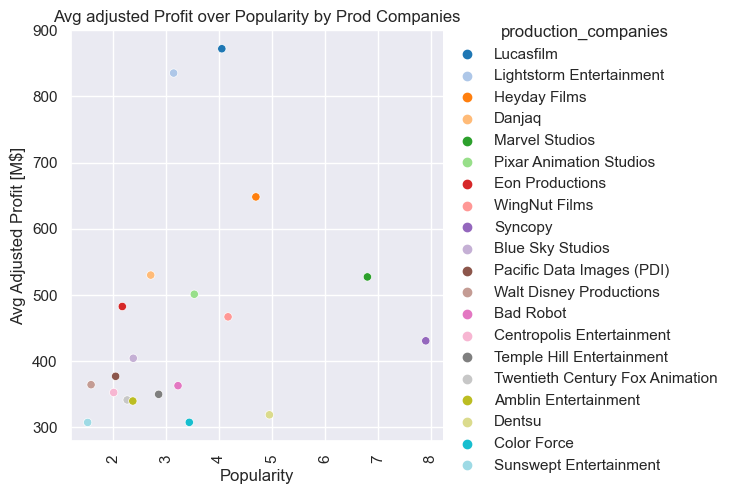

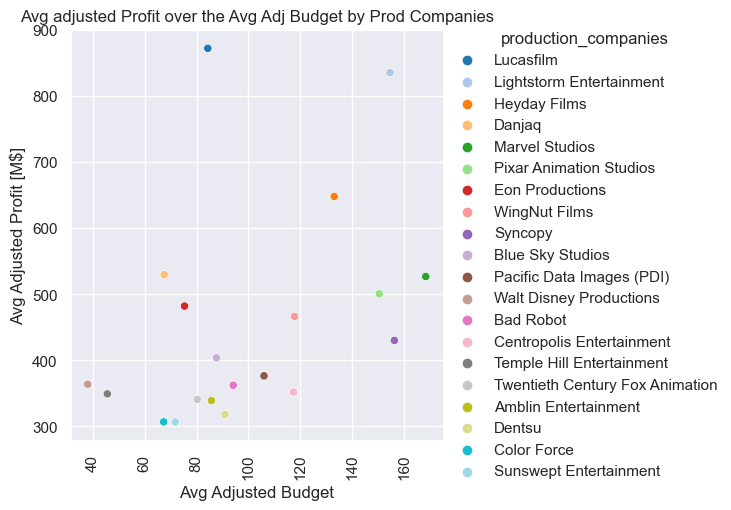

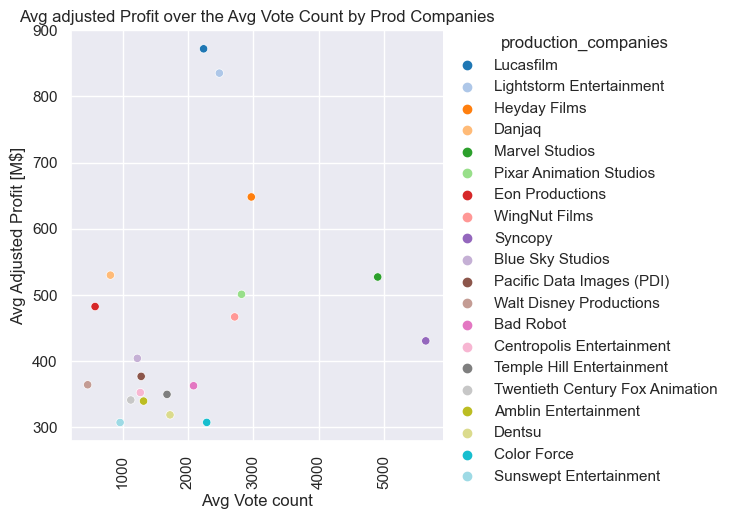

In [94]:
ax = sns.relplot(revenue_prod_comp_slice, x = 'popularity', y='profit_adj',
                 kind="scatter", hue='production_companies', markers=True, palette='tab20')
ax.set(xlabel='Popularity', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over Popularity by Prod Companies');
plt.xticks(rotation=90)

ax = sns.relplot(revenue_prod_comp_slice, x = 'budget_adj', y='profit_adj',
                 kind="scatter", hue='production_companies', markers=True, palette='tab20')
ax.set(xlabel='Avg Adjusted Budget', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over the Avg Adj Budget by Prod Companies');
plt.xticks(rotation=90);

ax = sns.relplot(revenue_prod_comp_slice, x = 'vote_count', y='profit_adj',
                 kind="scatter", hue='production_companies', markers=True, palette='tab20')
ax.set(xlabel='Avg Vote count', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over the Avg Vote Count by Prod Companies');
plt.xticks(rotation=90);

> The outcome of the 3 scatter plots is that -> There is no correlation between the avg **adj_profit** and **vote count** or **budget** or **popularity** over the ***production companies***.
> But based on the charts, the recommendation would be to go with **Lucasfilm** for the production of a movie, since the profit is higher with a smaller budget.

### Explore the  Adjusted profit/revenue by Keywords

> In this subchapter we want to take a look at the possible relation between the pair **Keywords** & **profit** and other parameters like **popularity**, **vote_count**, **adj_budget** or the movies themselves.

> For the last analysis we are following the exact steps of the previous one, therefore we will jump directly to the graphical visualization. 

> Note: the Amount of selected keywords is again 20, using the same constraints as in the previous exploration

In [95]:
revenue_keywords = revenue_df_clean.explode('keywords')
revenue_keywords = revenue_keywords.groupby('keywords')['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()
revenue_keywords.sort_values(by='profit_adj', ascending=False, inplace=True)

C:\Users\gavrilap\AppData\Local\Temp\ipykernel_137892\1909640647.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  revenue_keywords = revenue_keywords.groupby('keywords')['profit_adj','popularity', 'budget_adj', 'vote_count'].mean()


In [96]:
revenue_keywords

,profit_adj,popularity,budget_adj,vote_count
keywords,,,,
lightsaber,2750.136651,12.037933,39.575591,4428.0
hermit,2750.136651,12.037933,39.575591,4428.0
space war,2586.236848,9.432768,240.886903,8458.0
iceberg,2234.713671,4.355219,271.692064,4654.0
space colony,1981.617187,7.460604,144.257782,6206.0
...,...,...,...,...
eskimo,-118.534968,1.653031,118.535264,753.0
scandinavia,-128.681336,1.189386,209.448455,275.0
bagdad,-128.681336,1.189386,209.448455,275.0


In [97]:
count_keywords = revenue_df_clean.explode('keywords')
counts_k =count_keywords['keywords'].value_counts().to_frame()

In [98]:
counts_k

,keywords
based on novel,166
duringcreditsstinger,100
dystopia,95
sex,89
new york,84
...,...
secret base,1
hotel mom,1
living with parents,1
stutter,1


In [99]:
counts_k.rename(columns={'keywords': 'keywords_count'}, inplace=True)

In [100]:
keywords_combined = pd.merge(revenue_keywords, counts_k, how="inner", left_index=True, right_index=True)

In [101]:
keywords_combined[:20]

,profit_adj,popularity,budget_adj,vote_count,keywords_count
lightsaber,2750.136651,12.037933,39.575591,4428.000000,1
hermit,2750.136651,12.037933,39.575591,4428.000000,1
space war,2586.236848,9.432768,240.886903,8458.000000,1
iceberg,2234.713671,4.355219,271.692064,4654.000000,1
space colony,1981.617187,7.460604,144.257782,6206.000000,2
atlantic ocean,1878.643094,2.563191,28.362748,1415.000000,1
bathing,1878.643094,2.563191,28.362748,1415.000000,1
dalmatian,1545.635295,2.631987,29.179445,913.000000,1
death star,1404.937650,6.207928,103.739537,3202.000000,3
triceratops,1293.766704,2.204926,95.096608,3169.000000,1


In [102]:
keywords_combined = keywords_combined.query('profit_adj > 1') #those keywords with an average profit > 1M$ 
keywords_combined = keywords_combined.query('keywords_count > 5') #those keywords with more than 1 movie

In [103]:
keywords_combined

,profit_adj,popularity,budget_adj,vote_count,keywords_count
orcs,873.593810,7.082911,170.572894,4884.666667,6
middle-earth (tolkien),873.593810,7.082911,170.572894,4884.666667,6
culture clash,641.099505,2.242460,44.686093,1460.142857,7
cutting the cord,637.410263,4.773688,111.751316,2840.857143,7
elves,507.895323,4.419399,110.135160,2772.636364,11
...,...,...,...,...,...
based on video game,9.749663,0.825559,40.295282,272.333333,9
australia,9.672773,2.558041,33.781361,558.142857,14
key,8.104821,1.845161,58.839539,520.333333,6
witness,5.348516,0.655472,29.103068,110.166667,6


In [104]:
keywords_combined.index.rename('keywords', inplace=True)

In [105]:
keywords_combined

,profit_adj,popularity,budget_adj,vote_count,keywords_count
keywords,,,,,
orcs,873.593810,7.082911,170.572894,4884.666667,6
middle-earth (tolkien),873.593810,7.082911,170.572894,4884.666667,6
culture clash,641.099505,2.242460,44.686093,1460.142857,7
cutting the cord,637.410263,4.773688,111.751316,2840.857143,7
elves,507.895323,4.419399,110.135160,2772.636364,11
...,...,...,...,...,...
based on video game,9.749663,0.825559,40.295282,272.333333,9
australia,9.672773,2.558041,33.781361,558.142857,14
key,8.104821,1.845161,58.839539,520.333333,6


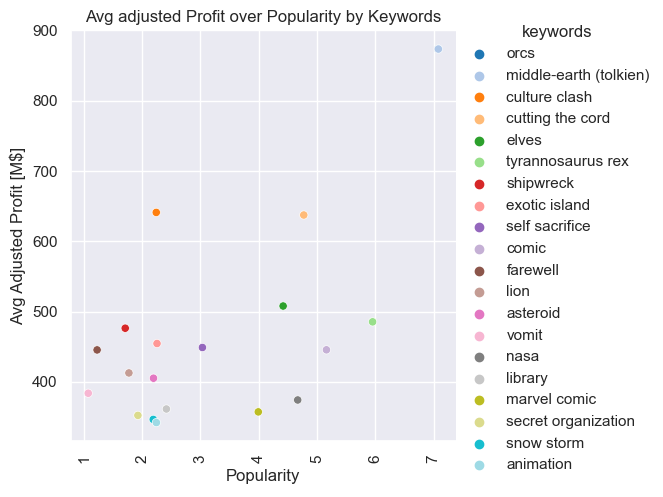

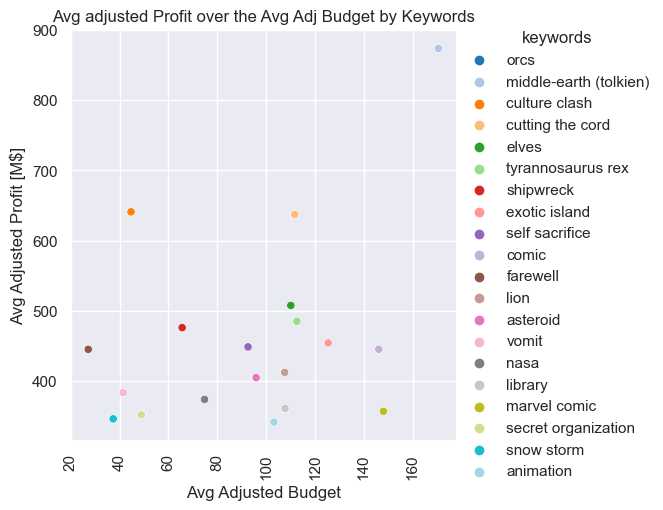

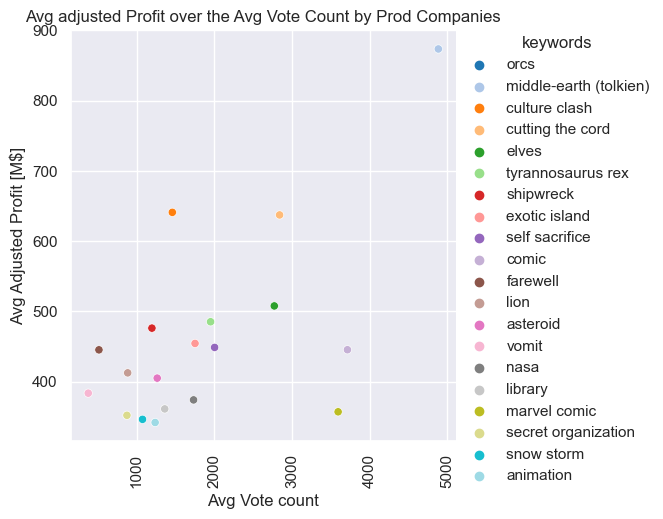

In [106]:
ax = sns.relplot(keywords_combined[:20], x = 'popularity', y='profit_adj',
                 kind="scatter", hue='keywords', markers=True, palette='tab20')
ax.set(xlabel='Popularity', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over Popularity by Keywords');
plt.xticks(rotation=90)

ax = sns.relplot(keywords_combined[:20], x = 'budget_adj', y='profit_adj',
                 kind="scatter", hue='keywords', markers=True, palette='tab20')
ax.set(xlabel='Avg Adjusted Budget', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over the Avg Adj Budget by Keywords');
plt.xticks(rotation=90);

ax = sns.relplot(keywords_combined[:20], x = 'vote_count', y='profit_adj',
                 kind="scatter", hue='keywords', markers=True, palette='tab20')
ax.set(xlabel='Avg Vote count', ylabel='Avg Adjusted Profit [M$]', title='Avg adjusted Profit over the Avg Vote Count by Prod Companies');
plt.xticks(rotation=90);

In [107]:
#revenue_df_clean.explode('keywords').query('keywords == "orcs"')

> The outcome of the 3 scatter plots is that -> No real correlation can be observed between the avg **adj_profit** and **vote count** or **budget** or **popularity** over the ***keywords***.
>
> Given the amount of keywords, maybe scatter plot is not the best tool to extract information.
>
> Also, it shows that we run into the overlaying issue, 2 keywords, `orcs` and `middle-earth(tolkien)` are overlaid - which makes one ask maybe they are used in the exact same movies (**Lord of the rings** series), biasing to a specific type of movie with few data points.

<a id='conclusions'></a>
## Conclusions

> To conclude:
> - Q1 - The most popular genre over the years is **adventure**. Other genres that have been steadily increasing are **action**, **science fiction** and **fantasy**. While **Animation** seems to be constant, neither at a low level of **popularity**, nor at a high level. Genres with quite low level of **popularity** are *TV movie*, *romance*, *horror*, *foreign*, *drama*, *documentary* and *comedy*, they have never been the most popular in 56 years
>
> - Q2 - By looking at the correlation matrix, the properties influencing the most, the adjusted revenue/profit, are the **popularity**, **vote_count** and **budget_adj**. On top of that, judging by the average profit of each **genres**, **animation** pops up as the most profitable in 56years.
>
>- Going further, observing the pairs Average Adjusted Profit vs Average Vote Count/Popularity/Adj Budget over the genres we spot a linear behaviour.
>
>- Columns `director`, `production_companies`, `keywords` seem to have little to limited impact on the revenue/profit. Although, I believe that more information can be extracted from them. or perhaps by using different tools.
>
> - The explorations/analysis made for **directors**, **keywords** and **production_companies** could be biased to low count of occurences. For example a director or company involved in a small amount of movies, but with perhaps high profits, can appear as an indicator of high revenue, while in reality it had a negligible impact.
>
>- Perhaps one other important limitation is represented by number of Movies for the second Question, I started with over 10k movies, but ended up with ~30% of them, as many of them were missing data for the column I had to judge **revenue_adj**. 
  
   

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295